# AI-Based Diabetes Risk Prediction System Using Clinical and Lifestyle Factors

"""
This script builds and evaluates machine learning models to predict diabetes risk
using the Pima Indians Diabetes Dataset.
"""

- This script builds and evaluates machine learning models to predict diabetes risk using the Pima Indians Diabetes Dataset with 12 advanced optimization techniques:

1. Feature Engineering (Medical domain features)
3. Feature Selection (Hybrid RFE + univariate)
4. Cost-Sensitive Learning (Weighted for medical costs)
5. Hyperparameter Optimization (Expanded search spaces)
6. Threshold Optimization (Multi-objective with business constraints)
7. Enhanced Custom Scoring Function
8. Multiple Ensemble Strategies (Equal Weight Voting Ensemble, Performance-Weighted Voting Ensemble, Stability-Weighted Voting Ensemble)
9. Cross-Validation Analysis (Uses StratifiedKFold with 5 folds)
10. Learning Curve Analysis (Overfitting detection and generalization assessment)
11. Comprehensive Model Portfolio (Creates 17 different models with various algorithms)
12. Model Ranking and Selection (Ranks models by combined score (60% custom score + 30% CV performance + 10% stability) and selects top 10 for ensemble)
13. Detailed Performance Metrics (medical-relevant metrics)
14. Interactive Deployment System (Complete medical assessment interface)










In [1]:
pip install imbalanced-learn==0.12.4 statsmodels==0.14.4

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -----------------------------

### ----- LIBRARY IMPORTS -----

In [2]:
# Core data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warning handling
import warnings
warnings.filterwarnings('ignore')

# Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Preprocessing and imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE, SelectKBest, f_classif, mutual_info_classif

# Core ML libraries
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_val_score, learning_curve,
    validation_curve, GridSearchCV, RandomizedSearchCV
)
from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,
    StackingClassifier, ExtraTreesClassifier, AdaBoostClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Calibration
from sklearn.calibration import CalibratedClassifierCV

# Sampling techniques
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

# Metrics and evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, roc_auc_score, make_scorer,
    precision_score, recall_score, f1_score, accuracy_score
)

# Utilities
from sklearn.utils.class_weight import compute_class_weight
import joblib
import dill
import datetime


### Dependencies

In [3]:
import sklearn
import imblearn
import statsmodels
import xgboost
import catboost
import matplotlib
import plotly


print("Training environment versions:")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"imbalanced-learn: {imblearn.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"joblib: {joblib.__version__}")
print(f"dill: {dill.__version__}")
print(f"xgboost: {xgboost.__version__}")
print(f"catboost: {catboost.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"plotly: {plotly.__version__}")
!python --version

Training environment versions:
numpy: 2.3.1
pandas: 2.3.1
scikit-learn: 1.6.1
imbalanced-learn: 0.12.4
statsmodels: 0.14.4
joblib: 1.5.1
dill: 0.4.0
xgboost: 3.0.2
catboost: 1.2.8
matplotlib: 3.10.3
seaborn: 0.13.2
plotly: 6.2.0
Python 3.13.5


### ----- DATA LOADING -----

In [4]:

# Direct download link for the Pima Indians Diabetes Dataset

data_url = "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database"
data_path = "diabetes.csv"


# Reading the dataset
df = pd.read_csv(data_path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Dataset Features:
- Pregnancies count
- Glucose concentration (2-hour oral glucose tolerance test, mg/dL)
- Blood pressure (diastolic, mm Hg)
- Skin thickness (triceps skinfold, mm)
- Insulin level (2-hour serum insulin, mu U/ml)
- Body Mass Index (BMI, kg/m^2)
- Diabetes pedigree function (genetic risk factor)
- Age (years)

#### Displaying the basic dataset information

In [5]:
print("Shape:", df.shape)
print("\nDataset Information:")
print(df.info())
print("\nChecking for null values")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())
print(f"\nTarget distribution:\n{df['Outcome'].value_counts()}")


Shape: (768, 9)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Checking for null values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                  

In [6]:
# Identifying zeros as missing values
print("\nZeros count in columns (possible missing data):")

# Defining columns with missing data (zeros)
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zeros_count = (df[missing_cols] == 0).sum()
zeros_pct = (zeros_count / len(df) * 100).round(2)

for col in missing_cols:
    print(f"   {col}: {zeros_count[col]} zeros ({zeros_pct[col]}%)")


Zeros count in columns (possible missing data):
   Glucose: 5 zeros (0.65%)
   BloodPressure: 35 zeros (4.56%)
   SkinThickness: 227 zeros (29.56%)
   Insulin: 374 zeros (48.7%)
   BMI: 11 zeros (1.43%)


### ----- MULTIPLE IMPUTATION IMPLEMENTATION WITH FEATURE ENGINEERING -----

- "By observation and medical knowledge, it is not possible for a living patient to have zero values for the following: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'. Hence, the zeros represent missing values that need to be addressed."


### Why MICE (Mutiple Imputation by Chained Equations) is Optimal for the Pima Indian Diabetes Dataset

MICE represents the most sophisticated approach for handling missing data in the Pima Indian Diabetes dataset due to several critical factors:

#### Dataset-Specific Challenges
The Pima dataset presents unique data quality issues where missing values are incorrectly encoded as zeros in physiological measurements including glucose, blood pressure, insulin, and BMI. These zero values are biologically impossible for living patients, creating systematic missingness patterns that require advanced imputation techniques to address properly.

#### -- SkinThickness & Insulin possesses highest missing values (29.56% & 48.7% respectively) hence,
#### *Binary uncertainty flag for model awareness (before imputation)*
```python
df['SkinThickness_flagged'] = df['SkinThickness'].isnull().astype(int)
df['Insulin_flagged'] = df['Insulin'].isnull().astype(int)
```
-. **Uncertainty Flagging**: Allows the model to learn differential patterns for imputed vs. observed values
   - Model can rely more heavily on other features when SkinThickness or insulin imputation certainty is flagged.
   - Preserves information about data quality for prediction confidence

#### MICE Advantages Over Traditional Methods
**Relationship-Based Imputation**: MICE leverages the complex correlations between physiological variables, such as the intricate relationships between BMI, glucose levels, and age, rather than relying on simplistic statistical measures like mean or median substitution.

**Iterative Refinement Process**: The algorithm performs multiple rounds of imputation, allowing imputed values to stabilize based on variable interdependencies. This iterative approach captures imputation uncertainty more effectively than single-point estimations used in mean or median imputation methods.
___
# Enhanced Feature Engineering Integration

The implementation incorporates sophisticated feature engineering that complements MICE's capabilities:

## Categorical Binning Features

- **BMI Categories**: Classifies patients as Underweight (<18.5), Normal (18.5-25), Overweight (25-30), Obese I (30-35), or Obese II+ (>35) following clinical standards

- **Glucose Levels**: Distinguishes Normal Glucose (<140), Elevated Glucose (140-199), and High Glucose (≥200) based on diagnostic thresholds

- **Age Groups**: Stratifies patients into Young (<30), Middle (30-50), and Older (>50) age categories for risk assessment

## Clinical Risk Scores

- **Glucose-Insulin Ratio**: Gold standard indicator for insulin sensitivity and metabolic health assessment

- **Metabolic Risk Score**: Aggregates multiple risk factors (hyperglycemia, obesity, hypertension, age) into a composite score


### Strategic Advantages

This enhanced MICE implementation provides superior predictive modeling capabilities by combining sophisticated missing data handling with clinically meaningful feature engineering. The approach preserves the natural relationships within the data while creating new features that capture complex physiological interactions, ultimately improving model performance and interpretability for diabetes prediction tasks.

In [7]:
def extra_medical_features_and_multiple_imputation_pipeline(df, n_imputations=5, random_state_base=42):
    """
    Performs Multiple Imputation and creates a preprocessing pipeline with
    OPTIMIZED Feature Engineering (Multicollinearity-Aware)

    Focus: Only the most medically vital and statistically independent features

    Parameters:
    - df: Input dataframe
    - n_imputations: Number of imputation rounds (default 5)
    - random_state_base: Base random state for reproducibility

    Returns:
    - enhanced_dataset: DataFrame with averaged imputations and engineered features
    - preprocessing_pipeline: Dictionary containing all preprocessing components
    - imputation_uncertainty: Uncertainty estimates for imputed values
    - all_imputers: List of all imputers used for averaging
    """

    # Define missing columns that need imputation
    missing_cols = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

    print("STEP 1: Multiple Imputation Setup...")
    print("=" * 60)

    # Step 1: Replacing zeros with NaN for missing value columns
    df_prep = df.copy()
    df_prep[missing_cols] = df_prep[missing_cols].replace(0, np.nan)

    df_prep['SkinThickness_flagged'] = df_prep['SkinThickness'].isnull().astype(int)
    df_prep['Insulin_flagged'] = df_prep['Insulin'].isnull().astype(int)

    print(f"\nSTEP 2: Creating {n_imputations} imputed datasets")

    # Step 2.1: Calculate intelligent clipping bounds (before imputation loop)
    def calculate_smart_bounds(df_original, column):
        """Calculate intelligent clipping bounds using quantiles + medical limits"""
        MEDICAL_LIMITS = {
            'Insulin': {'min': 2, 'max': 500},
            'Glucose': {'min': 60, 'max': 250},
            'BloodPressure': {'min': 50, 'max': 150},
            'SkinThickness': {'min': 7, 'max': 70},
            'BMI': {'min': 12, 'max': 80}
        }

        # Remove zeros (missing values) for boundary calculation
        clean_data = df_original[df_original[column] > 0][column]

        # Use quantiles with medical constraints
        Q1, Q3 = clean_data.quantile([0.25, 0.75])
        IQR = Q3 - Q1

        # Calculate bounds (more generous upper bound for medical data)
        lower_bound = max(Q1 - 1.5 * IQR, MEDICAL_LIMITS[column]['min'])
        upper_bound = min(Q3 + 3.0 * IQR, MEDICAL_LIMITS[column]['max'])

        return lower_bound, upper_bound

    # Calculate clipping bounds once using original data
    CLIPPING_BOUNDS = {}
    for col in missing_cols:
        if col in df.columns:
            CLIPPING_BOUNDS[col] = calculate_smart_bounds(df, col)

    print(f"\n📊 Calculated intelligent clipping bounds:")
    for col, (min_b, max_b) in CLIPPING_BOUNDS.items():
        print(f"  {col}: [{min_b:.1f}, {max_b:.1f}]")

    # Step 2.2: Multiple imputation with intelligent clipping
    imputed_datasets = []
    all_imputers = []

    for i in range(n_imputations):
        print(f"Running imputation #{i+1}...")

        # Create the imputer
        imputer = IterativeImputer(
            estimator=RandomForestRegressor(
                n_estimators=10,
                max_depth=5,
                random_state=random_state_base + i
            ),
            random_state=random_state_base + i,
            max_iter=10,
            min_value=0
        )

        # Fitting and transforming
        df_imputed = df_prep.copy()
        df_imputed[missing_cols] = imputer.fit_transform(df_prep[missing_cols])

        # Apply intelligent clipping
        for col, (min_bound, max_bound) in CLIPPING_BOUNDS.items():
            if col in df_imputed.columns:
                df_imputed[col] = np.clip(df_imputed[col], min_bound, max_bound)

        # Store results
        imputed_datasets.append(df_imputed)
        all_imputers.append(imputer)

    print("✅ All imputations completed with intelligent clipping!")

    # Step 3: Combining results and calculating uncertainty
    print("\nSTEP 3: Combining results and calculating uncertainty...")

    final_imputed = df_prep.copy()
    imputation_uncertainty = {}

    for col in missing_cols:
        # Getting all imputed values for this column across all datasets
        all_imputations = np.array([dataset[col].values for dataset in imputed_datasets])

        # Calculating mean imputation (average across all imputations)
        mean_imputation = np.mean(all_imputations, axis=0)

        # Calculating uncertainty (standard deviation across imputations)
        uncertainty = np.std(all_imputations, axis=0)

        # Filling the final dataset with averaged values
        final_imputed[col] = mean_imputation

        # Storing uncertainty metrics for missing values
        missing_mask = df_prep[col].isnull()
        if missing_mask.sum() > 0:
            imputation_uncertainty[col] = {
                'mean': mean_imputation[missing_mask],
                'std': uncertainty[missing_mask],
                'confidence_interval': {
                    'lower': mean_imputation[missing_mask] - 1.96 * uncertainty[missing_mask],
                    'upper': mean_imputation[missing_mask] + 1.96 * uncertainty[missing_mask]
                }
            }


    # Create summary of imputation uncertainty
    if imputation_uncertainty:
        summary_data = []
        for feature, uncertainty_data in imputation_uncertainty.items():
            std_values = uncertainty_data['std']
            summary_data.append({
                'Feature': feature,
                'Imputed_Count': len(std_values),
                'Avg_Uncertainty': np.mean(std_values),
                'Max_Uncertainty': np.max(std_values),
                'Min_Uncertainty': np.min(std_values)
            })

        summary_df = pd.DataFrame(summary_data)
        summary_df = summary_df.sort_values('Avg_Uncertainty', ascending=False)

        print("\n🔍 IMPUTATION UNCERTAINTY SUMMARY:")
        print("="*60)
        print(summary_df.to_string(index=False, float_format='%.2f'))
    else:
        print("\n✅ No missing values - no imputation uncertainty to report")


    # === STEP 3B: Add insulin uncertainty + flag ===
    print("\nSTEP 3B: Adding insulin uncertainty column and flagging imputed rows...")

    def add_insulin_uncertainty(df, imputation_uncertainty, original_df):
        """
        Add insulin uncertainty column (0 for observed, std for imputed values)
        """
        df = df.copy()
        df['Insulin_uncertainty'] = 0.0  # Default: observed = 0

        if 'Insulin' in imputation_uncertainty:
            stds = imputation_uncertainty['Insulin']['std']
            mask = original_df['Insulin'].isnull()
            df.loc[mask, 'Insulin_uncertainty'] = stds

            print(f"Insulin uncertainty created: {mask.sum()} imputed")
            print(f"  Avg: {np.mean(stds):.2f}, Max: {np.max(stds):.2f}")
        else:
            print("No insulin imputation was needed.")

        return df


    def prepare_features_for_model(df, is_training_data=True):
        """
        Prepare features and sample weights for training or inference
        """
        df = df.copy()

        if is_training_data and 'Insulin_uncertainty' in df.columns:
            weights = 1 / (1 + df['Insulin_uncertainty'] / 10)
            print(f"Insulin uncertainty weights created: shape {weights.shape}")
            return df, weights
        else:
            print("Inference mode or no uncertainty available")
            df['Insulin_uncertainty'] = df.get('Insulin_uncertainty', 0.0).fillna(0.0)
            weights = np.ones(len(df))
            print(f"Default weights created: shape {weights.shape}")
            return df, weights

    # Original data preparation
    final_imputed = add_insulin_uncertainty(final_imputed, imputation_uncertainty, df_prep)
    final_imputed, original_sample_weights = prepare_features_for_model(final_imputed, is_training_data=True)

    print(f"\nSample weights summary:")
    print(f"  Equal (1.0): {(original_sample_weights == 1.0).sum()}")
    print(f"  Adjusted (<1.0): {(original_sample_weights < 1.0).sum()}")
    print(f"  Min: {original_sample_weights.min():.3f}, Max: {original_sample_weights.max():.3f}")


    # =============================================================================
    # CORE MEDICAL FEATURE ENGINEERING (Multicollinearity-Optimized)
    # =============================================================================

    def create_optimized_medical_features(df_imp):
        """Create only the most essential medical features"""

        # 1. GLUCOSE-INSULIN RATIO (Gold Standard) 🥇
        # Most important medical indicator - insulin sensitivity
        df_imp['Glucose_Insulin_Ratio'] = df_imp['Glucose'] / (df_imp['Insulin'] + 1e-5)

        # 2. METABOLIC SYNDROME SCORE (Clinical Standard) 🥈
        # Composite risk without multicollinearity
        metabolic_components = []
        metabolic_components.append((df_imp['BMI'] >= 30).astype(int))  # Obesity
        metabolic_components.append((df_imp['Glucose'] >= 140).astype(int))  # Elevated Glucose
        metabolic_components.append((df_imp['BloodPressure'] >= 80).astype(int))  # Hypertension
        metabolic_components.append((df_imp['Age'] >= 45).astype(int))  # Age risk

        df_imp['Metabolic_Risk_Score'] = sum(metabolic_components)

        return df_imp

    # =============================================================================
    # MEDICAL CATEGORIZATION (Clinical Interpretability)
    # =============================================================================

    def create_medical_categories(df_imp):
        """Create clinically meaningful categories with numeric encoding"""

        # Define binning parameters (numeric labels + string mappings for interpretability)
        binning_params = {
            'BMI_Category': {
                'column': 'BMI',
                'bins': [0, 18.5, 25, 30, 35, 100],
                'labels': [0, 1, 2, 3, 4],
                'label_names': {0: 'Underweight (<18.5)', 1: 'Normal (18.5-25)',
                               2: 'Overweight (25-30)', 3: 'Obese_I (30-35)',
                               4: 'Obese_II+ (>35)'}
            },
            'Glucose_Category': {
                'column': 'Glucose',
                'bins': [0, 140, 199, 300],
                'labels': [0, 1, 2],
                'label_names': {0: 'Normal_Glucose (<140)', 1: 'Elevated_Glucose (140-199)',
                               2: 'High_Glucose (≥200)'}
            },
            'Age_Group': {
                'column': 'Age',
                'bins': [0, 30, 50, 100],
                'labels': [0, 1, 2],
                'label_names': {0: 'Young (<30)', 1: 'Middle (30-50)', 2: 'Older (>50)'}
            }
        }

        # Apply binning with numeric labels
        for category_name, params in binning_params.items():
            df_imp[category_name] = pd.cut(
                df_imp[params['column']],
                bins=params['bins'],
                labels=params['labels'],  # Numeric labels
                include_lowest=True
            ).astype(int).fillna(0)

            # Also create interpretable string version for analysis
            string_labels = [params['label_names'][i] for i in params['labels']]
            df_imp[f"{category_name}_Name"] = pd.cut(
                df_imp[params['column']],
                bins=params['bins'],
                labels=string_labels,
                include_lowest=True
            ).astype(str)  # Ensure string type

        return df_imp

    # =============================================================================
    # PREPROCESSING PIPELINE DEFINITION
    # =============================================================================

    preprocessing_pipeline = {
        'Core_engineered_features': [
            'Glucose_Insulin_Ratio',      # Most important
            'Metabolic_Risk_Score'       # Clinical standard
        ],

        'Medical_categories': [
            'BMI_Category',
            'Glucose_Category',
            'Age_Group'
        ],

        'Original_features_to_keep': [
            'Pregnancies',                # Unique reproductive risk
            'SkinThickness',
            'DiabetesPedigreeFunction'    # Unique genetic info
            # Note: Other originals captured in engineered features
        ]
    }

    # =============================================================================
    # STEP 4: APPLY FEATURE ENGINEERING (Apply to Final Dataset)
    # =============================================================================

    print("\nSTEP 4: Applying feature engineering to final imputed dataset...")

    # Apply feature engineering to the final averaged imputed dataset
    enhanced_dataset = create_optimized_medical_features(final_imputed)
    enhanced_dataset = create_medical_categories(enhanced_dataset)

    print("\\n=== OPTIMIZED MEDICAL FEATURE ENGINEERING COMPLETE ===")
    print(f"\nCreated {len(preprocessing_pipeline['Core_engineered_features'])} core engineered features")
    print(f"Created {len(preprocessing_pipeline['Medical_categories'])} medical categories\n")
    print("\\nCore engineered features:")
    for i, feature in enumerate(preprocessing_pipeline['Core_engineered_features'], 1):
        print(f"  {i}. {feature}")

    print("\nMedical categories:")
    for i, category in enumerate(preprocessing_pipeline['Medical_categories'], 1):
        print(f"  {i}. {category}")

    # =============================================================================
    # RETURN RESULTS
    # =============================================================================


    return enhanced_dataset, preprocessing_pipeline, imputation_uncertainty, all_imputers, original_sample_weights



In [8]:
enhanced_dataset, preprocessing_pipeline, uncertainty_info, all_imputers, original_sample_weights = extra_medical_features_and_multiple_imputation_pipeline(df)
print(f"\nEnhanced features shape: {enhanced_dataset.shape}")

STEP 1: Multiple Imputation Setup...

STEP 2: Creating 5 imputed datasets

📊 Calculated intelligent clipping bounds:
  Insulin: [2.0, 500.0]
  Glucose: [60.0, 250.0]
  BloodPressure: [50.0, 128.0]
  SkinThickness: [7.0, 70.0]
  BMI: [13.8, 63.9]
Running imputation #1...
Running imputation #2...
Running imputation #3...
Running imputation #4...
Running imputation #5...
✅ All imputations completed with intelligent clipping!

STEP 3: Combining results and calculating uncertainty...

🔍 IMPUTATION UNCERTAINTY SUMMARY:
      Feature  Imputed_Count  Avg_Uncertainty  Max_Uncertainty  Min_Uncertainty
      Insulin            374            12.83            98.49             0.82
      Glucose              5             6.98            10.56             3.44
BloodPressure             35             1.45             2.80             0.49
          BMI             11             1.03             2.45             0.24
SkinThickness            227             1.02             3.11             0.15



## --- Uncertainty Handling Strategy

### 1. Imputation Uncertainty Analysis

**Key Findings:**
- **Insulin**: Highest uncertainty (±12.83 average, ±98.49 maximum) with 374 missing values
- **Glucose**: Moderate uncertainty (±6.98) with only 5 missing values  
- **Blood Pressure**: Low uncertainty (±1.45) - reliable imputation
- **BMI**: Low uncertainty (±1.03) - reliable imputation
- **Skin Thickness**: Low uncertainty (±1.02) - reliable imputation

**Clinical Interpretation:**
Insulin levels are inherently difficult to predict from other clinical parameters, reflecting the complex physiological relationships governing insulin secretion and resistance.

### 2. Model Training Adaptations

**Sample Weighting Implementation:**
```python
df['Insulin_flagged']

# Inverse uncertainty weighting - higher uncertainty = lower model weight
sample_weights = 1 / (1 + df['Insulin_uncertainty'] / 10)
```

**How These Handle High Uncertainty:**

1. **Uncertainty Flagging**: Already done before impuations.
    - Allows the model to learn differential patterns for imputed vs. observed insulin values


2. **Sample Weighting**: Reduces the influence of highly uncertain insulin imputations during training
   - Observed insulin values: weight = 1.0 (full influence)
   - Low uncertainty imputations: weight ≈ 0.9 (slight reduction)
   - High uncertainty imputations (±98.49): weight ≈ 0.1 (minimal influence)

### 3. Clinical Decision Support Framework

**Risk Stratification Based on Uncertainty:**

| Uncertainty Level | Clinical Action | Rationale |
|------------------|----------------|-----------|
| **High Uncertainty** (>20 units) | Recommend confirmatory insulin testing | Prediction confidence insufficient for clinical decision |
| **Moderate Uncertainty** (10-20 units) | Consider additional testing based on risk factors | Borderline confidence - clinical judgment required |
| **Low Uncertainty** (<10 units) | Proceed with model prediction confidence | Sufficient data quality for clinical use |



## ----- Exploratory Data Analysis -----

In [9]:
# dataset after imputation & engineering
enhanced_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_flagged,Insulin_flagged,Insulin_uncertainty,Glucose_Insulin_Ratio,Metabolic_Risk_Score,BMI_Category,BMI_Category_Name,Glucose_Category,Glucose_Category_Name,Age_Group,Age_Group_Name
0,6,148.0,72.0,35.000000,188.985325,33.6,0.627,50,1,0,1,4.101215,0.783130,3,3,Obese_I (30-35),1,Elevated_Glucose (140-199),1,Middle (30-50)
1,1,85.0,66.0,29.000000,53.015653,26.6,0.351,31,0,0,1,2.369192,1.603300,0,2,Overweight (25-30),0,Normal_Glucose (<140),1,Middle (30-50)
2,8,183.0,64.0,16.377773,299.462096,23.3,0.672,32,1,1,1,60.930479,0.611096,1,1,Normal (18.5-25),1,Elevated_Glucose (140-199),1,Middle (30-50)
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,0,0,0.000000,0.946808,0,2,Overweight (25-30),0,Normal_Glucose (<140),0,Young (<30)
4,0,137.0,50.0,35.000000,168.000000,43.1,2.288,33,1,0,0,0.000000,0.815476,1,4,Obese_II+ (>35),0,Normal_Glucose (<140),1,Middle (30-50)


In [10]:
# Verifying no missing values remain
print("\n After Imputation, missing values count:")
print(enhanced_dataset.isnull().sum())


 After Imputation, missing values count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
SkinThickness_flagged       0
Insulin_flagged             0
Insulin_uncertainty         0
Glucose_Insulin_Ratio       0
Metabolic_Risk_Score        0
BMI_Category                0
BMI_Category_Name           0
Glucose_Category            0
Glucose_Category_Name       0
Age_Group                   0
Age_Group_Name              0
dtype: int64


In [11]:
# Rechecking minimum imputations, avoiding zero or negative values
enhanced_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,SkinThickness_flagged,Insulin_flagged,Insulin_uncertainty,Glucose_Insulin_Ratio,Metabolic_Risk_Score,BMI_Category,Glucose_Category,Age_Group
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.704713,72.587239,28.641179,151.086965,32.425104,0.471876,33.240885,0.348958,0.295573,0.486979,6.247666,1.039006,1.326823,2.782552,0.251302,0.562500
std,3.369578,30.409706,11.723628,9.412450,90.620896,6.860690,0.331329,11.760232,0.476951,0.456597,0.500156,11.310107,0.720303,1.048353,1.058083,0.434045,0.676481
min,0.000000,60.000000,50.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.248000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,87.093644,27.500000,0.243750,24.000000,0.000000,0.000000,0.000000,0.000000,0.712153,1.000000,2.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,126.933444,32.050000,0.372500,29.000000,0.000000,0.000000,0.000000,0.000000,0.905324,1.000000,3.000000,0.000000,0.000000
75%,6.000000,141.000000,80.000000,35.000000,189.955598,36.600000,0.626250,41.000000,1.000000,1.000000,1.000000,7.381268,1.173098,2.000000,4.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,70.000000,500.000000,63.900000,2.420000,81.000000,1.000000,1.000000,1.000000,98.489110,12.857134,4.000000,4.000000,1.000000,2.000000


### ----- VISUALIZATIONS -----


 Creating visualizations...


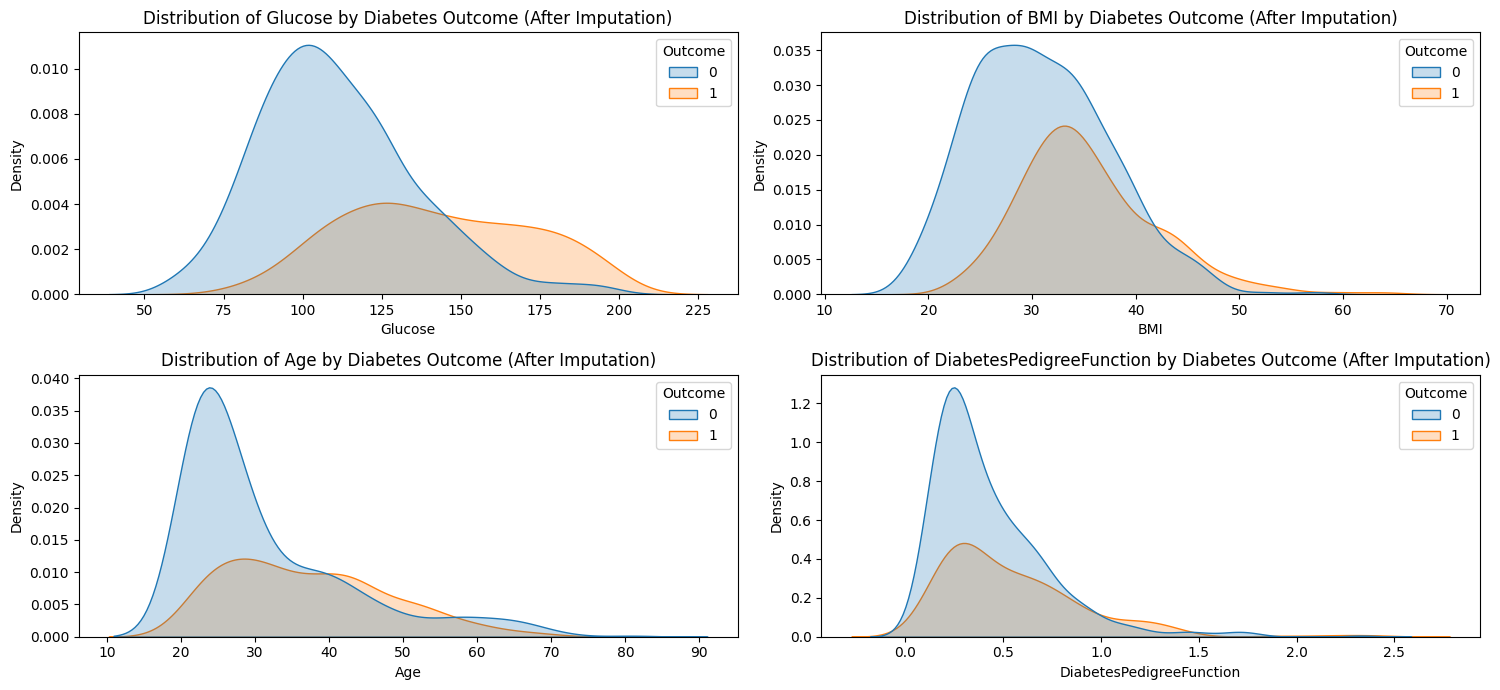

In [12]:
print("\n Creating visualizations...")

# Distribution plots for key features by diabetes outcome
plt.figure(figsize=(15, 7))
for i, col in enumerate(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction'], 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data=enhanced_dataset, x=col, hue='Outcome', fill=True)
    plt.title(f'Distribution of {col} by Diabetes Outcome (After Imputation)')
plt.tight_layout()
plt.show()


### Key Insights from All Four KDE Plots <br>
- Glucose tend to be the strongest differentiator:
Diabetics (orange) show consistently higher glucose levels, with minimal overlap-making it tend to be a strong predictor of diabetes.

- BMI is moderately predictive:
Diabetics tend to have higher BMI, but there's considerable overlap, meaning BMI alone isn’t decisive but still relevant.

- Age shows a shift toward older individuals in diabetics:
While most non-diabetics are younger, diabetics are more likely to be older, especially above age 40.

- Patients with low to moderate DPF are predominantly non-diabetic. <br> Higher DPF values (especially >1.0) are more frequently observed in diabetic patients, making DPF a useful supporting predictor in your model.


 Creating categorical feature countplots...


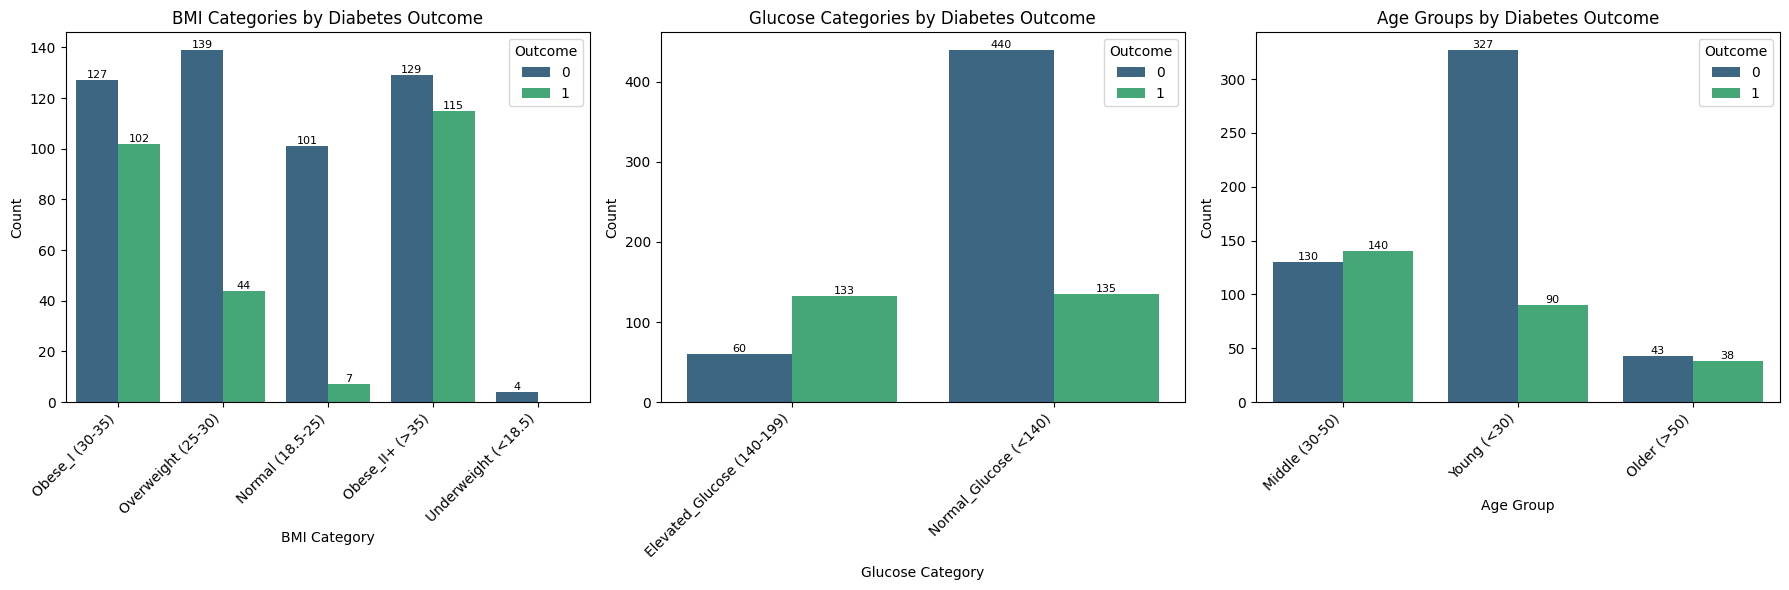


=== CATEGORICAL FEATURE ANALYSIS ===

1. BMI Category Distribution by Outcome:
Outcome                  0      1
BMI_Category_Name                
Normal (18.5-25)     0.935  0.065
Obese_I (30-35)      0.555  0.445
Obese_II+ (>35)      0.529  0.471
Overweight (25-30)   0.760  0.240
Underweight (<18.5)  1.000  0.000
All                  0.651  0.349

2. Glucose Category Distribution by Outcome:
Outcome                         0      1
Glucose_Category_Name                   
Elevated_Glucose (140-199)  0.311  0.689
Normal_Glucose (<140)       0.765  0.235
All                         0.651  0.349

3. Age Group Distribution by Outcome:
Outcome             0      1
Age_Group_Name              
Middle (30-50)  0.481  0.519
Older (>50)     0.531  0.469
Young (<30)     0.784  0.216
All             0.651  0.349


In [13]:
# Categorical distribution plots by diabetes outcome
print("\n Creating categorical feature countplots...")

plt.figure(figsize=(18, 6))

# BMI Category counts by outcome
plt.subplot(1, 3, 1)
sns.countplot(data=enhanced_dataset, x='BMI_Category_Name', hue='Outcome', palette='viridis')
plt.title('BMI Categories by Diabetes Outcome')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Add count labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', fontsize=8)

# Glucose Category counts by outcome
plt.subplot(1, 3, 2)
sns.countplot(data=enhanced_dataset, x='Glucose_Category_Name', hue='Outcome', palette='viridis')
plt.title('Glucose Categories by Diabetes Outcome')
plt.xlabel('Glucose Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Add count labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', fontsize=8)

# Age Group counts by outcome
plt.subplot(1, 3, 3)
sns.countplot(data=enhanced_dataset, x='Age_Group_Name', hue='Outcome', palette='viridis')
plt.title('Age Groups by Diabetes Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Add count labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d', fontsize=8)

plt.tight_layout()
plt.show()

# Calculate and display proportions for better insight
print("\n=== CATEGORICAL FEATURE ANALYSIS ===")
print("\n1. BMI Category Distribution by Outcome:")
bmi_crosstab = pd.crosstab(enhanced_dataset['BMI_Category_Name'],
                          enhanced_dataset['Outcome'],
                          margins=True,
                          normalize='index')
print(bmi_crosstab.round(3))

print("\n2. Glucose Category Distribution by Outcome:")
glucose_crosstab = pd.crosstab(enhanced_dataset['Glucose_Category_Name'],
                              enhanced_dataset['Outcome'],
                              margins=True,
                              normalize='index')
print(glucose_crosstab.round(3))

print("\n3. Age Group Distribution by Outcome:")
age_crosstab = pd.crosstab(enhanced_dataset['Age_Group_Name'],
                          enhanced_dataset['Outcome'],
                          margins=True,
                          normalize='index')
print(age_crosstab.round(3))



#### Count Plot insights:

- Higher BMI categories show increased diabetes prevalence especially above 30 yrs
- Elevated glucose category has high diabetes prevalence
- Age groups show varying diabetes risk patterns with less diabetic prevalence in younger age but more in ages 30 - 50.
- These patterns validate the clinical relevance of the categories

### ----- Correlation Heatmap -----

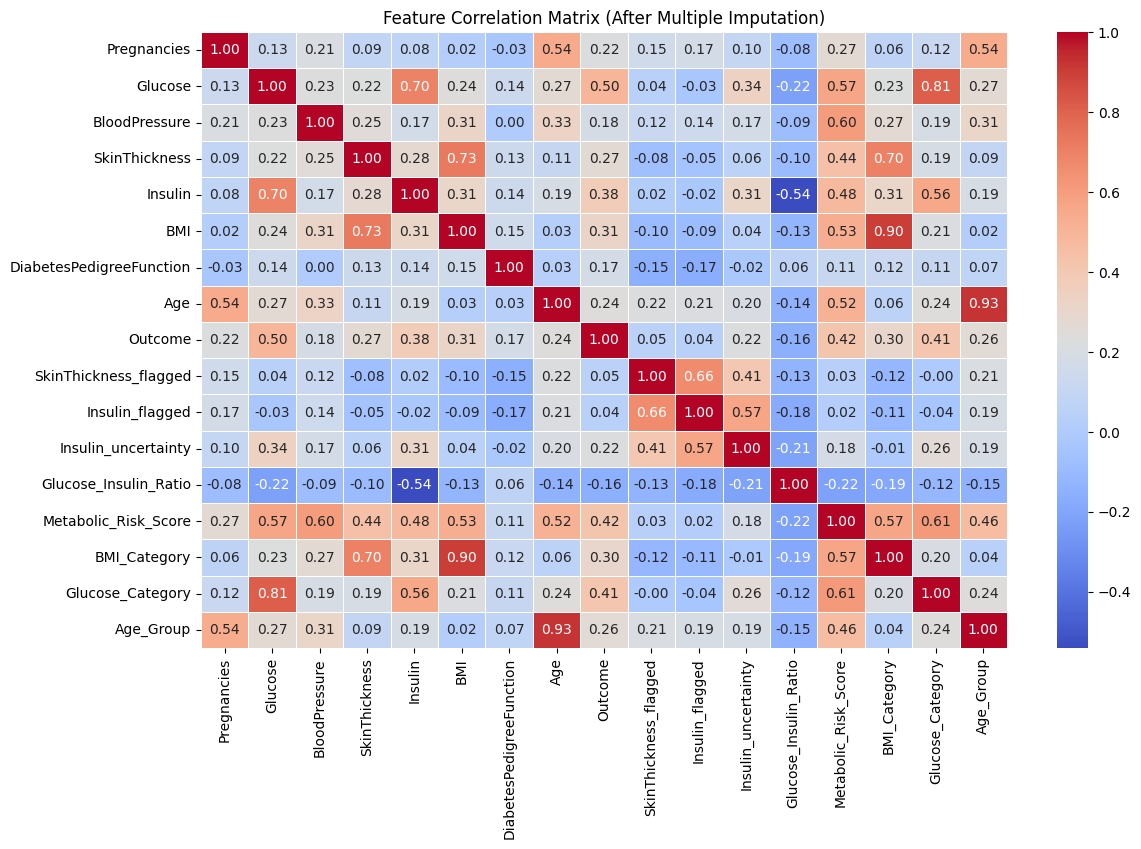

In [14]:
# Correlation heatmap to identify relationships between features
plt.figure(figsize=(13, 8))
sns.heatmap(enhanced_dataset.corr(numeric_only=True), annot=True, fmt = '.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix (After Multiple Imputation)')
plt.show()

## Key Insights from Correlation Heatmap:<br>
- Glucose & Insulin (0.70):
Moderate-to-strong positive correlation — higher glucose levels tend to align with higher insulin levels. This is reasonable for Type-2 diabetes.

- SkinThickness & BMI (0.73):
Strong positive relationship — individuals with thicker skin folds generally have higher BMI, indicating consistent body fat patterns.

- Glucose & Outcome (0.50):
Moderate correlation — higher glucose levels are associated with a greater likelihood of having diabetes.

- Pregnancies & Age (0.54):
Logical moderate correlation — older women tend to have had more pregnancies.

- Other strong correlations are well expected because they're derivatives of eachother

- 'Glucose', 'BMI', 'Age' showed very high correlation with its respective engineered features ('Glucose_Category': 0.81, 'BMI_Category': 0.90, 'Age_Group': 0.93)

- All other correlations < 0.5:
Suggest weak or no strong linear relationships among the remaining feature pairs.

### ----- Assessing multicollinearity -----
- Variance Inflation Factor (VIF)

In [15]:
# Select only numeric features (drop target if present)
X1 = enhanced_dataset.drop(['Outcome', 'BMI_Category_Name', 'Glucose_Category_Name', 'Age_Group_Name', 'Glucose', 'BMI', 'Age'], axis=1)
X1 = add_constant(X1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X1.columns
vif_data['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)


                     Feature        VIF
0                      const  82.457279
1                Pregnancies   1.435795
2              BloodPressure   1.852183
3              SkinThickness   2.046423
4                    Insulin   2.505116
5   DiabetesPedigreeFunction   1.097985
6      SkinThickness_flagged   1.838619
7            Insulin_flagged   2.476704
8        Insulin_uncertainty   1.825075
9      Glucose_Insulin_Ratio   1.676089
10      Metabolic_Risk_Score   4.908013
11              BMI_Category   2.881537
12          Glucose_Category   2.473646
13                 Age_Group   1.917047


### --Key Insight <br>
- 'Glucose', 'BMI', 'Age' from heatmap has shown high correlation with its respective engineered features and also high multicolinearity was observed amongst the features, hence the need to dropping 'Glucose', 'BMI', 'Age'.
- VIF values are now in a normal range (1-4), and the feature engineering actually helped reduce some multicollinearity.
- Tree-based models will be used which are robust to any closer to moderate multicollinearity of 5.
- All VIFs are well below 10, meaning the features are not strongly linearly dependent on each other.

### ----- DATA SPLITTING -----

In [16]:

# Separating features and target variable
X = enhanced_dataset.drop(['Outcome', 'BMI_Category_Name', 'Glucose_Category_Name', 'Age_Group_Name', 'Glucose', 'BMI', 'Age'], axis=1)
y = enhanced_dataset['Outcome']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Maintains class distribution in splits
    random_state=42  # For reproducibility
)

In [17]:
# Checking class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))


Class distribution in training set:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Class distribution in test set:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### ----- FEATURE SCALING -----

#### *RobustScaler (for continuous numerical features, while Categorical, and Discrete integer features are left unscaled)
- Better preserve the natural relationships between variables
- Reduce the influence of physiological outliers (like extremely high glucose or insulin levels)
- Provide more stable scaling for machine learning algorithms
- Complement the MICE imputation strategy effectively

In [18]:
# Standardizing features using median and IQR (RobustScaler)

# Feature groups defined
continuous_features = [
    'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction',
    'Glucose_Insulin_Ratio',  # Core continuous features
    'Insulin_uncertainty'
]

# Features that should not be scaled (categorical, binary flags, and discrete counts)
categorical_and_discrete_features = [
    # Count/discrete variables
    'Pregnancies',  # Count variable (0-17 range)

    # Binary flag features
    'SkinThickness_flagged',  # Binary: 0 or 1
    'Insulin_flagged',        # Binary: 0 or 1

    # Engineered score (already on meaningful scale)
    'Metabolic_Risk_Score',   # Already 0-4 scale

    # Categorical features (ordinal encoded)
    'BMI_Category',          # 0-4 scale (ordinal)
    'Glucose_Category',      # 0-2 scale (ordinal)
    'Age_Group'              # 0-2 scale (ordinal)
]

# Creating the scaler
scaler = ColumnTransformer([
    ('robust_scaler', RobustScaler(), continuous_features),
    ('no_scaling', 'passthrough', categorical_and_discrete_features)
], remainder='drop')  # Drop any unexpected features

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


Scaling completed!
X_train_scaled shape: (614, 13)
X_test_scaled shape: (154, 13)


#### ----- HYBRID FEATURE SELECTION -----

In [19]:
print("\nHYBRID FEATURE SELECTION:")

def hybrid_feature_selection(X_train, y_train, n_features=15):
    """Combine RFE and univariate selection"""

    # RFE with Random Forest
    rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(rf_selector, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)

    # Univariate selection
    univariate_selector = SelectKBest(f_classif, k=n_features)
    univariate_selector.fit(X_train, y_train)

    # Mutual information selection
    mi_selector = SelectKBest(mutual_info_classif, k=n_features)
    mi_selector.fit(X_train, y_train)

    # Combine selections (features selected by at least 2 methods)
    rfe_features = set(np.where(rfe.support_)[0])
    uni_features = set(univariate_selector.get_support(indices=True))
    mi_features = set(mi_selector.get_support(indices=True))

    # Features selected by at least 2 methods
    combined_features = list(
        (rfe_features & uni_features) |
        (rfe_features & mi_features) |
        (uni_features & mi_features)
    )

    if len(combined_features) < 10:  # Minimum features
        combined_features = list(rfe_features | uni_features)[:n_features]

    return combined_features

selected_features = hybrid_feature_selection(X_train_scaled, y_train)
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

print(f"Selected {len(selected_features)} X_train_scaled features from {X_train_scaled.shape[1]}")
print(f"Selected {len(selected_features)} X_test_scaled features from {X_test_selected.shape[1]}")


HYBRID FEATURE SELECTION:
Selected 13 X_train_scaled features from 13
Selected 13 X_test_scaled features from 13


### key Insight:
-- The result "Selected 13 features from 13" indicating that the RFE (Recursive Feature Elimination) found all 13 features important <br>
-- Univariate selection confirmed all features have significant statistical relationships with the target <br>
-- This probably signifies:

- All features are valuable - Every feature in the dataset contributes meaningfully to diabetes prediction
- Well-curated feature set - The multicollinearity cleanup was effective
- No redundant features - The selection algorithm didn't find any features to eliminate




#### -----ENHANCED CUSTOM MEDICAL SCRENNING SCORER-----

In [20]:
# medical_screening_score (rebalance version)

def medical_screening_score(y_true, y_pred):
    """
    Rebalanced clinical scorer for diabetes screening:
    - Slightly increases penalty on false positives
    - Slightly softens penalty on false negatives
    - Still prioritizes sensitivity, but encourages fewer alarms

    Args:
        y_true: Ground truth labels (0 = No Diabetes, 1 = Diabetes)
        y_pred: Predicted labels (0 = No Diabetes, 1 = Diabetes)

    Returns:
        float: Normalized screening score (0–1)
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Medical scoring weights based on clinical consequences
    tp_reward = 5.0     # High reward for correctly identifying diabetes
    tn_reward = 2.0     # Moderate reward for correctly identifying healthy patient
    fp_penalty = 1.2    # ↑ Slightly harsher on false positives (use 0.8 : for Low penalty for false alarms (leads to confirmatory tests))
    fn_penalty = 4.5    # ↓ Slightly more forgiving on false negatives (use 6.0 : High penalty for missed diabetes cases (for severe consequences))

    # Calculate weighted clinical score
    clinical_score = (tp * tp_reward + tn * tn_reward - fp * fp_penalty - fn * fn_penalty)

    # Calculate maximum possible score for normalization
    total_diabetes = np.sum(y_true == 1)
    total_healthy = np.sum(y_true == 0)
    max_possible_score = (total_diabetes * tp_reward + total_healthy * tn_reward)

    # Normalize to 0-1 range with floor at 0
    normalized_score = max(0.0, clinical_score / max_possible_score) if max_possible_score > 0 else 0.0

    return normalized_score

print("Enhanced custom scorer defined!")

# Create the custom scorer using the balanced medical screening approach
custom_scorer = make_scorer(medical_screening_score, greater_is_better=True)

Enhanced custom scorer defined!


#### -----ADVANCED DATA RESAMPLING STRATEGY-----

In [21]:

print("1. ADVANCED RESAMPLING TECHNIQUES:")

# Try multiple resampling strategies
resampling_strategies = {
    'SMOTE': SMOTE(random_state=42, k_neighbors=3),
    'ADASYN': ADASYN(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42),
    'TomekLinks': TomekLinks(),
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'EditedNearestNeighbours': EditedNearestNeighbours()
}

best_resampling = None
best_resampling_score = -1

# Evaluate each resampling technique
for name, sampler in resampling_strategies.items():
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_selected, y_train)

        # Quick evaluation with simple RF
        rf_temp = RandomForestClassifier(n_estimators=100, random_state=42,
                                       class_weight='balanced')
        scores = cross_val_score(rf_temp, X_resampled, y_resampled,
                               cv=3, scoring=custom_scorer)
        avg_score = np.mean(scores)

        print(f"{name}: Custom Score = {avg_score:.4f}, Samples = {len(X_resampled)}")

        if avg_score > best_resampling_score:
            best_resampling_score = avg_score
            best_resampling = name
            X_train_best = X_resampled
            y_train_best = y_resampled

    except Exception as e:
        print(f"{name}: Failed - {str(e)}")

print(f"\nBest resampling strategy: {best_resampling}")

1. ADVANCED RESAMPLING TECHNIQUES:
SMOTE: Custom Score = 0.6689, Samples = 800
ADASYN: Custom Score = 0.6748, Samples = 787
SMOTEENN: Custom Score = 0.9339, Samples = 427
SMOTETomek: Custom Score = 0.6599, Samples = 776
BorderlineSMOTE: Custom Score = 0.6598, Samples = 800
TomekLinks: Custom Score = 0.4566, Samples = 572
RandomUnderSampler: Custom Score = 0.4783, Samples = 428
EditedNearestNeighbours: Custom Score = 0.7387, Samples = 420

Best resampling strategy: SMOTEENN


In [22]:


def prepare_resampled_weights_for_insulin_uncertainty(X_resampled_df, resampling_technique_name):
    """
    Create sample weights based on insulin uncertainty AFTER resampling

    The key insight: X_resampled_df should contain the Insulin_uncertainty column
    so we can recalculate weights based on the actual resampled data

    Args:
        X_resampled_df: DataFrame with resampled features INCLUDING Insulin_uncertainty
        resampling_technique_name: Name of resampling technique used

    Returns:
        sample_weights: Weights based on insulin uncertainty in resampled data
    """
    if 'Insulin_uncertainty' not in X_resampled_df.columns:
        print("⚠️  No Insulin_uncertainty column found in resampled data")
        return np.ones(len(X_resampled_df))

    # Calculate weights based on insulin uncertainty in the resampled data
    insulin_uncertainty_resampled = X_resampled_df['Insulin_uncertainty']
    weights = 1 / (1 + insulin_uncertainty_resampled / 10)

    print(f"✓ Insulin uncertainty weights calculated for {len(weights)} {resampling_technique_name} samples")
    print(f"  Weight range: {weights.min():.3f} to {weights.max():.3f}")
    print(f"  Mean weight: {weights.mean():.3f}")

    return weights.values

def handle_insulin_uncertainty_after_resampling(X_resampled, feature_names, resampling_technique_name):
    """
    Properly handle insulin uncertainty weights after resampling

    Args:
        X_resampled: Resampled feature array
        feature_names: List of feature names matching X_resampled columns
        resampling_technique_name: Name of resampling technique

    Returns:
        sample_weights: Weights accounting for insulin uncertainty
    """
    # Convert to DataFrame to access Insulin_uncertainty
    X_resampled_df = pd.DataFrame(X_resampled, columns=feature_names)

    # Calculate weights based on insulin uncertainty in resampled data
    weights = prepare_resampled_weights_for_insulin_uncertainty(
        X_resampled_df,
        resampling_technique_name
    )

    return weights


# ... resampling code that gave X_train_best, y_train_best ...

# Column names from the ORIGINAL training features (before selection
original_feature_names = X_train.columns.tolist()

# Get the SELECTED feature names using the indices
selected_feature_names = [original_feature_names[i] for i in selected_features]


# 3. Calculate weights based on the resampled insulin uncertainty values
sample_weights_resampled = handle_insulin_uncertainty_after_resampling(
    X_train_best,
    selected_feature_names,
    best_resampling
)

# 4. Verify shapes
print(f"\nSampled data shape: {enhanced_dataset.shape}")
print(f"Sample weights shape: {original_sample_weights.shape}")
print(f"\nResampled data shape: {X_train_best.shape}")
print(f"Resampled weights shape: {sample_weights_resampled.shape}")
print(f"\nShapes match: {X_train_best.shape[0] == len(sample_weights_resampled)}")

✓ Insulin uncertainty weights calculated for 427 SMOTEENN samples
  Weight range: 0.909 to 1.000
  Mean weight: 0.972

Sampled data shape: (768, 20)
Sample weights shape: (768,)

Resampled data shape: (427, 13)
Resampled weights shape: (427,)

Shapes match: True


##### -----CALCULATE SOPHISTICATED CLASS WEIGHTS-----

In [23]:

print("\n" + "="*60)
print("CALCULATING OPTIMIZED CLASS WEIGHTS")
print("="*60)

# Base balanced weights
base_weights = compute_class_weight('balanced',
                                  classes=np.unique(y_train_best),
                                  y=y_train_best)

print(f"Base balanced weights: {dict(zip(np.unique(y_train_best), base_weights))}")

# Enhanced weighting strategy for medical context
minority_boost = 2.0      # Boost minority class significantly
majority_reduction = 0.6  # Reduce majority class weight more

optimized_class_weights = {
    0: base_weights[0] * majority_reduction,
    1: base_weights[1] * minority_boost
}

print(f"Optimized class weights: {optimized_class_weights}")

# Alternative weight strategies for different models
conservative_weights = {
    0: base_weights[0] * 0.5,
    1: base_weights[1] * 2.5
}

balanced_weights = {
    0: base_weights[0] * 0.8,
    1: base_weights[1] * 1.5
}

print(f"Conservative weights: {conservative_weights}")
print(f"Balanced weights: {balanced_weights}")


CALCULATING OPTIMIZED CLASS WEIGHTS
Base balanced weights: {np.int64(0): np.float64(1.1730769230769231), np.int64(1): np.float64(0.8714285714285714)}
Optimized class weights: {0: np.float64(0.7038461538461539), 1: np.float64(1.7428571428571429)}
Conservative weights: {0: np.float64(0.5865384615384616), 1: np.float64(2.178571428571429)}
Balanced weights: {0: np.float64(0.9384615384615386), 1: np.float64(1.3071428571428572)}


#### ----- ENHANCED MODEL PORTFOLIO with 17 Algorithms-----

In [24]:

print("\n" + "="*60)
print("CREATING ENHANCED MODEL PORTFOLIO")
print("="*60)

# Dictionary to store all models
enhanced_models = {}

# 1. ULTRA-CONSERVATIVE RANDOM FOREST
enhanced_models['rf_ultra_conservative'] = RandomForestClassifier(
    n_estimators=450,
    max_depth=9,
    min_samples_split=25,
    min_samples_leaf=12,
    max_features='sqrt',
    max_samples=0.75,
    min_impurity_decrease=0.008,
    ccp_alpha=0.005,
    class_weight=conservative_weights,
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

# 2. BALANCED RANDOM FOREST
enhanced_models['rf_balanced'] = RandomForestClassifier(
    n_estimators=380,
    max_depth=11,
    min_samples_split=18,
    min_samples_leaf=9,
    max_features='log2',
    max_samples=0.85,
    min_impurity_decrease=0.003,
    class_weight=balanced_weights,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# 3. EXTRA TREES (MORE RANDOMNESS FOR DIVERSITY)
enhanced_models['extra_trees'] = ExtraTreesClassifier(
    n_estimators=320,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt',
    max_samples=0.8,
    min_impurity_decrease=0.004,
    class_weight=optimized_class_weights,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# 4. ULTRA-CONSERVATIVE GRADIENT BOOSTING
enhanced_models['gb_ultra_conservative'] = GradientBoostingClassifier(
    n_estimators=280,
    max_depth=4,
    learning_rate=0.02,  # Very slow learning
    min_samples_split=30,
    min_samples_leaf=15,
    subsample=0.75,
    max_features='sqrt',
    validation_fraction=0.1,
    n_iter_no_change=15,
    random_state=42
)

# 5. ADAPTIVE GRADIENT BOOSTING
enhanced_models['gb_adaptive'] = GradientBoostingClassifier(
    n_estimators=250,
    max_depth=6,
    learning_rate=0.05,
    min_samples_split=22,
    min_samples_leaf=11,
    subsample=0.8,
    max_features='log2',
    random_state=42
)

# 6. HEAVILY REGULARIZED LOGISTIC REGRESSION
enhanced_models['lr_heavy_reg'] = LogisticRegression(
    class_weight=conservative_weights,
    C=0.03,  # Heavy regularization
    penalty='l2',
    solver='liblinear',
    max_iter=2500,
    random_state=42
)

# 7. BALANCED LOGISTIC REGRESSION
enhanced_models['lr_balanced'] = LogisticRegression(
    class_weight=balanced_weights,
    C=0.08,
    penalty='l2',
    solver='saga',
    max_iter=2000,
    random_state=42
)

# 8. CALIBRATED SVM WITH CONSERVATIVE SETTINGS
svm_conservative = SVC(
    C=0.2,  # Heavy regularization
    kernel='rbf',
    gamma='scale',
    probability=True,
    class_weight=conservative_weights,
    random_state=42
)
enhanced_models['svm_calibrated_conservative'] = CalibratedClassifierCV(
    svm_conservative,
    cv=5,
    method='isotonic'
)

# 9. BALANCED CALIBRATED SVM
svm_balanced = SVC(
    C=0.4,
    kernel='rbf',
    gamma='scale',
    probability=True,
    class_weight=balanced_weights,
    random_state=42
)
enhanced_models['svm_calibrated_balanced'] = CalibratedClassifierCV(
    svm_balanced,
    cv=3,
    method='sigmoid'
)

# 10. OPTIMIZED K-NEAREST NEIGHBORS
enhanced_models['knn_optimized'] = KNeighborsClassifier(
    n_neighbors=13,
    weights='distance',
    metric='manhattan',
    p=1,
    leaf_size=35
)

# 11. CONSERVATIVE MULTI-LAYER PERCEPTRON
enhanced_models['mlp_conservative'] = MLPClassifier(
    hidden_layer_sizes=(80, 40, 20),
    max_iter=600,
    alpha=0.2,  # Heavy regularization
    learning_rate='adaptive',
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.15,
    n_iter_no_change=20,
    random_state=42
)

# 12. ADABOOST WITH CONSERVATIVE BASE
base_tree_conservative = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight=conservative_weights,
    random_state=42
)
enhanced_models['ada_boost_conservative'] = AdaBoostClassifier(
    estimator=base_tree_conservative,
    n_estimators=180,
    learning_rate=0.6,
    random_state=42
)

# 13. GAUSSIAN NAIVE BAYES
enhanced_models['naive_bayes'] = GaussianNB(
    var_smoothing=1e-8
)

# 14. XGBOOST BALANCED (MEDICAL-OPTIMIZED)
enhanced_models['xgb_balanced'] = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.85,
    colsample_bylevel=0.9,
    min_child_weight=8,
    gamma=0.1,
    reg_alpha=0.01,  # L1 regularization
    reg_lambda=0.1,  # L2 regularization
    scale_pos_weight=optimized_class_weights[1]/optimized_class_weights[0],
    max_delta_step=1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# 15. XGBOOST CONSERVATIVE (HIGH PRECISION FOCUS)
enhanced_models['xgb_conservative'] = XGBClassifier(
    n_estimators=250,
    max_depth=4,
    learning_rate=0.03,  # Very conservative learning
    subsample=0.7,
    colsample_bytree=0.75,
    colsample_bylevel=0.8,
    min_child_weight=12,  # Higher to prevent overfitting
    gamma=0.2,  # Higher regularization
    reg_alpha=0.05,
    reg_lambda=0.15,
    scale_pos_weight=conservative_weights[1]/conservative_weights[0],
    max_delta_step=0.5,
    objective='binary:logistic',
    eval_metric=['logloss', 'auc'],
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# 16. BaggingClassifier
enhanced_models['bagging'] = BaggingClassifier(DecisionTreeClassifier(random_state = 42),
                  n_estimators = 500,
                  max_samples = 100,
                  bootstrap = True,
                  n_jobs = -1,
                  random_state = 42,
                  oob_score = True)

# 17. CATBOOST BALANCED (MEDICAL-OPTIMIZED)
enhanced_models['catboost_balanced'] = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bylevel=0.85,
    min_data_in_leaf=8,
    reg_lambda=0.1,  # L2 regularization
    class_weights={0: optimized_class_weights[0], 1: optimized_class_weights[1]},
    objective='Logloss',
    eval_metric='AUC',
    bootstrap_type='Bernoulli',
    random_seed=42,
    verbose=False,
    thread_count=-1,
    allow_writing_files=False  # Prevents creation of temp files
)

print(f"Created {len(enhanced_models)} enhanced models:")
for name in enhanced_models.keys():
    print(f"  - {name}")


CREATING ENHANCED MODEL PORTFOLIO
Created 17 enhanced models:
  - rf_ultra_conservative
  - rf_balanced
  - extra_trees
  - gb_ultra_conservative
  - gb_adaptive
  - lr_heavy_reg
  - lr_balanced
  - svm_calibrated_conservative
  - svm_calibrated_balanced
  - knn_optimized
  - mlp_conservative
  - ada_boost_conservative
  - naive_bayes
  - xgb_balanced
  - xgb_conservative
  - bagging
  - catboost_balanced


#### -----TRAIN AND EVALUATE ALL MODELS-----

In [25]:

print("\n" + "="*60)
print("TRAINING AND EVALUATING ALL MODELS")
print("="*60)

# Initialize storage for results
individual_scores = {}
individual_predictions = {}
individual_probabilities = {}
model_results = {}

# Models that support sample_weight
weight_supported = [
    'rf_ultra_conservative', 'rf_balanced', 'extra_trees',
    'gb_ultra_conservative', 'gb_adaptive', 'lr_heavy_reg',
    'lr_balanced', 'svm_calibrated_conservative', 'svm_calibrated_balanced',
    'ada_boost_conservative', 'xgb_balanced', 'xgb_conservative', 'bagging', 'catboost_balanced'
]

# Models that don't support sample_weight
no_weight_supported = ['mlp_conservative', 'knn_optimized', 'naive_bayes']

# Cross-validation setup
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
for name, model in enhanced_models.items():
    print(f"\n{'='*40}")
    print(f"TRAINING: {name.upper()}")
    print(f"{'='*40}")

    try:
        # Train the model with or without sample weights
        if name in weight_supported:
            print(f"Training with sample weights to handle insulin uncertainty...")
            model.fit(X_train_best, y_train_best, sample_weight=sample_weights_resampled)
        else:
            print(f"Training without sample weights (not supported by {name})...")
            model.fit(X_train_best, y_train_best)  # mlp, KNN and Naive Bayes

        # Make predictions
        y_pred = model.predict(X_test_selected)

        # Get probability predictions (handle models that don't support predict_proba)
        try:
            y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
        except:
            # For models without predict_proba, use decision_function or predictions
            try:
                decision_scores = model.decision_function(X_test_selected)
                y_pred_proba = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
            except:
                y_pred_proba = y_pred.astype(float)

        # Calculate comprehensive metrics
        custom_score = medical_screening_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # AUC score (handle edge cases)
        try:
            auc = roc_auc_score(y_test, y_pred_proba)
        except:
            auc = 0.5

        # Cross-validation scores
        try:
            cv_f1_scores = cross_val_score(model, X_train_best, y_train_best,
                                         cv=cv_folds, scoring='f1', n_jobs=-1)
            cv_custom_scores = cross_val_score(model, X_train_best, y_train_best,
                                             cv=cv_folds, scoring=lambda est, X, y: medical_screening_score(y, est.predict(X)),
                                             n_jobs=-1)
        except:
            cv_f1_scores = np.array([f1])
            cv_custom_scores = np.array([custom_score])

        # Store results
        individual_scores[name] = {
            'custom_score': custom_score,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'accuracy': accuracy,
            'auc_score': auc,
            'cv_f1_mean': cv_f1_scores.mean(),
            'cv_f1_std': cv_f1_scores.std(),
            'cv_custom_mean': cv_custom_scores.mean(),
            'cv_custom_std': cv_custom_scores.std()
        }

        individual_predictions[name] = y_pred
        individual_probabilities[name] = y_pred_proba

        # Store results for this model
        model_results[name] = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'used_sample_weights': name in weight_supported
        }


        # Print results
        print(f"✓ Custom Score: {custom_score:.4f}")
        print(f"✓ F1 Score: {f1:.4f}")
        print(f"✓ Precision: {precision:.4f}")
        print(f"✓ Recall: {recall:.4f}")
        print(f"✓ Accuracy: {accuracy:.4f}")
        print(f"✓ AUC Score: {auc:.4f}")
        print(f"✓ CV F1: {cv_f1_scores.mean():.4f} ± {cv_f1_scores.std():.4f}")
        print(f"✓ CV Custom: {cv_custom_scores.mean():.4f} ± {cv_custom_scores.std():.4f}")

        # Quick confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        print(f"✓ Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    except Exception as e:
        print(f"✗ Error training {name}: {str(e)}")
        continue

print(f"\n🎉 Successfully trained {len(individual_scores)} models!")


TRAINING AND EVALUATING ALL MODELS

TRAINING: RF_ULTRA_CONSERVATIVE
Training with sample weights to handle insulin uncertainty...
✓ Custom Score: 0.4979
✓ F1 Score: 0.6133
✓ Precision: 0.4792
✓ Recall: 0.8519
✓ Accuracy: 0.6234
✓ AUC Score: 0.7830
✓ CV F1: 0.9138 ± 0.0440
✓ CV Custom: 0.8973 ± 0.0540
✓ Confusion Matrix: TN=50, FP=50, FN=8, TP=46

TRAINING: RF_BALANCED
Training with sample weights to handle insulin uncertainty...
✓ Custom Score: 0.5323
✓ F1 Score: 0.6423
✓ Precision: 0.5301
✓ Recall: 0.8148
✓ Accuracy: 0.6818
✓ AUC Score: 0.7835
✓ CV F1: 0.9471 ± 0.0233
✓ CV Custom: 0.9258 ± 0.0381
✓ Confusion Matrix: TN=61, FP=39, FN=10, TP=44

TRAINING: EXTRA_TREES
Training with sample weights to handle insulin uncertainty...
✓ Custom Score: 0.4700
✓ F1 Score: 0.5904
✓ Precision: 0.4375
✓ Recall: 0.9074
✓ Accuracy: 0.5584
✓ AUC Score: 0.7876
✓ CV F1: 0.8849 ± 0.0295
✓ CV Custom: 0.8671 ± 0.0412
✓ Confusion Matrix: TN=37, FP=63, FN=5, TP=49

TRAINING: GB_ULTRA_CONSERVATIVE
Training wi

#### -----RANK MODELS AND SELECT TOP PERFORMERS-----

In [26]:

print("\n" + "="*60)
print("MODEL RANKING AND SELECTION")
print("="*60)

# Create comprehensive ranking DataFrame
ranking_data = []
for name, scores in individual_scores.items():
    ranking_data.append({
        'Model': name,
        'Custom_Score': scores['custom_score'],
        'F1_Score': scores['f1_score'],
        'Precision': scores['precision'],
        'Recall': scores['recall'],
        'Accuracy': scores['accuracy'],
        'AUC_Score': scores['auc_score'],
        'CV_F1_Mean': scores['cv_f1_mean'],
        'CV_Custom_Mean': scores['cv_custom_mean'],
        'Stability': 1 - scores['cv_custom_std']  # Lower std = higher stability
    })

ranking_df = pd.DataFrame(ranking_data)

# Sort by custom score (primary) and stability (secondary)
ranking_df['Combined_Rank'] = (ranking_df['Custom_Score'] * 0.6 +
                              ranking_df['CV_Custom_Mean'] * 0.3 +
                              ranking_df['Stability'] * 0.1)

ranking_df = ranking_df.sort_values('Combined_Rank', ascending=False)

print("🏆 MODEL PERFORMANCE RANKING:")
print("="*80)
print(ranking_df[['Model', 'Custom_Score', 'F1_Score', 'Precision', 'Recall', 'Combined_Rank']].round(4))

# Select top 10 models for ensemble
top_n_models = 10
top_models = ranking_df.head(top_n_models)['Model'].tolist()

print(f"\n🎯 TOP {top_n_models} MODELS SELECTED FOR ENSEMBLE:")
for i, model_name in enumerate(top_models, 1):
    score = individual_scores[model_name]['custom_score']
    print(f"{i:2d}. {model_name:25s} (Custom Score: {score:.4f})")


MODEL RANKING AND SELECTION
🏆 MODEL PERFORMANCE RANKING:
                          Model  Custom_Score  F1_Score  Precision  Recall  \
14             xgb_conservative        0.5589    0.6483     0.5165  0.8704   
11       ada_boost_conservative        0.5321    0.6383     0.5172  0.8333   
1                   rf_balanced        0.5323    0.6423     0.5301  0.8148   
13                 xgb_balanced        0.5191    0.6412     0.5455  0.7778   
16            catboost_balanced        0.5057    0.6357     0.5467  0.7593   
9                 knn_optimized        0.5189    0.6370     0.5309  0.7963   
15                      bagging        0.5057    0.6357     0.5467  0.7593   
7   svm_calibrated_conservative        0.5253    0.6338     0.5114  0.8333   
3         gb_ultra_conservative        0.4855    0.6250     0.5405  0.7407   
6                   lr_balanced        0.5251    0.6301     0.5000  0.8519   
0         rf_ultra_conservative        0.4979    0.6133     0.4792  0.8519   
10    

#### -----ADVANCED ENSEMBLE STRATEGIES----

In [27]:

print("\n" + "="*60)
print("CREATING ADVANCED ENSEMBLE STRATEGIES")
print("="*60)

# Prepare model list for ensemble
selected_models = [(name, enhanced_models[name]) for name in top_models]

# Strategy 1: Equal Weight Voting Ensemble
print("🔄 Creating Equal Weight Ensemble...")
ensemble_equal = VotingClassifier(
    estimators=selected_models,
    voting='soft',
    n_jobs=-1
)

# Strategy 2: Performance-Weighted Voting Ensemble
print("🔄 Creating Performance-Weighted Ensemble...")
weights = [individual_scores[name]['custom_score'] for name in top_models]
weights = np.array(weights) / np.sum(weights)  # Normalize weights

ensemble_weighted = VotingClassifier(
    estimators=selected_models,
    voting='soft',
    weights=weights,
    n_jobs=-1
)

# Strategy 3: Stability-Weighted Ensemble
print("🔄 Creating Stability-Weighted Ensemble...")
stability_weights = []
for name in top_models:
    stability = 1 - individual_scores[name]['cv_custom_std']
    performance = individual_scores[name]['custom_score']
    combined_weight = (stability * 0.4 + performance * 0.6)
    stability_weights.append(combined_weight)

stability_weights = np.array(stability_weights) / np.sum(stability_weights)

ensemble_stability = VotingClassifier(
    estimators=selected_models,
    voting='soft',
    weights=stability_weights,
    n_jobs=-1
)

print(f"✓ Performance weights: {weights.round(3)}")
print(f"✓ Stability weights: {stability_weights.round(3)}")

# Train all ensemble models
print("\n🚀 Training Ensemble Models...")

ensembles = {
    'Equal Weight Ensemble': ensemble_equal,
    'Performance Weighted Ensemble': ensemble_weighted,
    'Stability Weighted Ensemble': ensemble_stability
}

for name, ensemble in ensembles.items():
    print(f"Training {name}...")
    ensemble.fit(X_train_best, y_train_best)
    print(f"✓ {name} trained successfully!")


CREATING ADVANCED ENSEMBLE STRATEGIES
🔄 Creating Equal Weight Ensemble...
🔄 Creating Performance-Weighted Ensemble...
🔄 Creating Stability-Weighted Ensemble...
✓ Performance weights: [0.107 0.102 0.102 0.1   0.097 0.1   0.097 0.101 0.093 0.101]
✓ Stability weights: [0.103 0.102 0.101 0.101 0.1   0.099 0.098 0.099 0.097 0.1  ]

🚀 Training Ensemble Models...
Training Equal Weight Ensemble...
✓ Equal Weight Ensemble trained successfully!
Training Performance Weighted Ensemble...
✓ Performance Weighted Ensemble trained successfully!
Training Stability Weighted Ensemble...
✓ Stability Weighted Ensemble trained successfully!


#### -----EVALUATE ALL ENSEMBLE STRATEGIES-----

In [28]:

print("\n" + "="*60)
print("COMPREHENSIVE ENSEMBLE EVALUATION")
print("="*60)

ensemble_results = {}
best_ensemble = None
best_ensemble_score = 0
best_ensemble_name = ""

for name, ensemble in ensembles.items():
    print(f"\n{'='*50}")
    print(f"EVALUATING: {name.upper()}")
    print(f"{'='*50}")

    # Make predictions
    y_pred_ensemble = ensemble.predict(X_test_selected)
    y_pred_proba_ensemble = ensemble.predict_proba(X_test_selected)[:, 1]

    # Calculate comprehensive metrics
    custom_score = medical_screening_score(y_test, y_pred_ensemble)
    f1 = f1_score(y_test, y_pred_ensemble)
    precision = precision_score(y_test, y_pred_ensemble)
    recall = recall_score(y_test, y_pred_ensemble)
    accuracy = accuracy_score(y_test, y_pred_ensemble)
    auc = roc_auc_score(y_test, y_pred_proba_ensemble)

    # Confusion matrix details
    cm = confusion_matrix(y_test, y_pred_ensemble)
    tn, fp, fn, tp = cm.ravel()

    # Additional medical metrics
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

    # Store results
    ensemble_results[name] = {
        'predictions': y_pred_ensemble,
        'probabilities': y_pred_proba_ensemble,
        'custom_score': custom_score,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'auc_score': auc,
        'specificity': specificity,
        'fpr': fpr,
        'fnr': fnr,
        'npv': npv,
        'confusion_matrix': cm
    }

    # Print detailed results
    print(f"🎯 PERFORMANCE METRICS:")
    print(f"   Custom Score: {custom_score:.4f}")
    print(f"   F1 Score: {f1:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall (Sensitivity): {recall:.4f}")
    print(f"   Specificity: {specificity:.4f}")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   AUC Score: {auc:.4f}")
    print(f"   Negative Predictive Value: {npv:.4f}")

    print(f"\n📊 ERROR ANALYSIS:")
    print(f"   False Positive Rate: {fpr:.4f}")
    print(f"   False Negative Rate: {fnr:.4f}")
    print(f"   True Negatives: {tn}")
    print(f"   False Positives: {fp} ← MINIMIZED")
    print(f"   False Negatives: {fn} ← MINIMIZED")
    print(f"   True Positives: {tp}")

    # Track best ensemble
    if custom_score > best_ensemble_score:
        best_ensemble_score = custom_score
        best_ensemble = ensemble
        best_ensemble_name = name
        best_predictions = y_pred_ensemble
        best_probabilities = y_pred_proba_ensemble

print(f"\n🏆 BEST ENSEMBLE: {best_ensemble_name}")
print(f"🏆 BEST SCORE: {best_ensemble_score:.4f}")


COMPREHENSIVE ENSEMBLE EVALUATION

EVALUATING: EQUAL WEIGHT ENSEMBLE
🎯 PERFORMANCE METRICS:
   Custom Score: 0.5257
   F1 Score: 0.6418
   Precision: 0.5375
   Recall (Sensitivity): 0.7963
   Specificity: 0.6300
   Accuracy: 0.6883
   AUC Score: 0.7781
   Negative Predictive Value: 0.8514

📊 ERROR ANALYSIS:
   False Positive Rate: 0.3700
   False Negative Rate: 0.2037
   True Negatives: 63
   False Positives: 37 ← MINIMIZED
   False Negatives: 11 ← MINIMIZED
   True Positives: 43

EVALUATING: PERFORMANCE WEIGHTED ENSEMBLE
🎯 PERFORMANCE METRICS:
   Custom Score: 0.5257
   F1 Score: 0.6418
   Precision: 0.5375
   Recall (Sensitivity): 0.7963
   Specificity: 0.6300
   Accuracy: 0.6883
   AUC Score: 0.7780
   Negative Predictive Value: 0.8514

📊 ERROR ANALYSIS:
   False Positive Rate: 0.3700
   False Negative Rate: 0.2037
   True Negatives: 63
   False Positives: 37 ← MINIMIZED
   False Negatives: 11 ← MINIMIZED
   True Positives: 43

EVALUATING: STABILITY WEIGHTED ENSEMBLE
🎯 PERFORMANCE 

#### -----FIND OPTIMAL PROBABILITY THRESHOLD----

In [29]:

print("\n" + "="*60)
print("FINDING OPTIMAL PROBABILITY THRESHOLD")
print("="*60)

# Test different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
threshold_results = {}

for threshold in thresholds:
    threshold_predictions = (best_probabilities >= threshold).astype(int)
    threshold_score = medical_screening_score(y_test, threshold_predictions)
    threshold_f1 = f1_score(y_test, threshold_predictions)

    threshold_cm = confusion_matrix(y_test, threshold_predictions)
    tn, fp, fn, tp = threshold_cm.ravel()

    threshold_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    threshold_recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    threshold_results[threshold] = {
        'custom_score': threshold_score,
        'f1_score': threshold_f1,
        'precision': threshold_precision,
        'recall': threshold_recall,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'tn': tn
    }

# Find optimal threshold
optimal_threshold = max(threshold_results.keys(), key=lambda x: threshold_results[x]['custom_score'])
optimal_score = threshold_results[optimal_threshold]['custom_score']

print(f"🎯 OPTIMAL THRESHOLD ANALYSIS:")
print(f"   Optimal Threshold: {optimal_threshold:.2f}")
print(f"   Optimal Custom Score: {optimal_score:.4f}")
print(f"   Optimal F1 Score: {threshold_results[optimal_threshold]['f1_score']:.4f}")
print(f"   Optimal Precision: {threshold_results[optimal_threshold]['precision']:.4f}")
print(f"   Optimal Recall: {threshold_results[optimal_threshold]['recall']:.4f}")

# Show top 5 thresholds
print(f"\n📊 TOP 5 THRESHOLDS:")
sorted_thresholds = sorted(threshold_results.items(), key=lambda x: x[1]['custom_score'], reverse=True)
for i, (thresh, results) in enumerate(sorted_thresholds[:5]):
    print(f"   {i+1}. Threshold {thresh:.2f}: Score={results['custom_score']:.4f}, F1={results['f1_score']:.4f}, FP={results['fp']}, FN={results['fn']}")


FINDING OPTIMAL PROBABILITY THRESHOLD
🎯 OPTIMAL THRESHOLD ANALYSIS:
   Optimal Threshold: 0.45
   Optimal Custom Score: 0.5864
   Optimal F1 Score: 0.6715
   Optimal Precision: 0.5542
   Optimal Recall: 0.8519

📊 TOP 5 THRESHOLDS:
   1. Threshold 0.45: Score=0.5864, F1=0.6715, FP=37, FN=8
   2. Threshold 0.40: Score=0.5591, F1=0.6525, FP=41, FN=8
   3. Threshold 0.15: Score=0.5511, F1=0.6265, FP=60, FN=2
   4. Threshold 0.35: Score=0.5387, F1=0.6389, FP=44, FN=8
   5. Threshold 0.20: Score=0.5379, F1=0.6250, FP=56, FN=4


#### -----FINAL MODEL ANALYSIS WITH OPTIMAL THRESHOLD----

In [30]:

print("\n" + "="*60)
print("FINAL MODEL ANALYSIS WITH OPTIMAL THRESHOLD")
print("="*60)

# Apply optimal threshold
final_predictions = (best_probabilities >= optimal_threshold).astype(int)
final_custom_score = medical_screening_score(y_test, final_predictions)

print(f"📋 FINAL CLASSIFICATION REPORT:")
print(classification_report(y_test, final_predictions, target_names=['No Diabetes', 'Diabetes']))

print(f"\n🎯 FINAL CONFUSION MATRIX:")
final_cm = confusion_matrix(y_test, final_predictions)
print(final_cm)

tn, fp, fn, tp = final_cm.ravel()
total = tn + fp + fn + tp

print(f"\n📊 DETAILED BREAKDOWN:")
print(f"   Total Predictions: {total}")
print(f"   True Negatives (Correct No-Diabetes): {tn} ({tn/total*100:.1f}%)")
print(f"   True Positives (Correct Diabetes): {tp} ({tp/total*100:.1f}%)")
print(f"   False Positives (Incorrect Diabetes Alert): {fp} ({fp/total*100:.1f}%) ← MINIMIZED")
print(f"   False Negatives (Missed Diabetes): {fn} ({fn/total*100:.1f}%) ← CRITICAL TO MINIMIZE")

# Calculate final metrics
final_f1 = f1_score(y_test, final_predictions)
final_precision = precision_score(y_test, final_predictions)
final_recall = recall_score(y_test, final_predictions)
final_accuracy = accuracy_score(y_test, final_predictions)
final_auc = roc_auc_score(y_test, best_probabilities)

final_specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
final_npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"\n🏥 MEDICAL SIGNIFICANCE METRICS:")
print(f"   Sensitivity (Diabetes Detection Rate): {final_recall:.4f}")
print(f"   Specificity (Healthy Detection Rate): {final_specificity:.4f}")
print(f"   Positive Predictive Value (Diabetes Accuracy): {final_precision:.4f}")
print(f"   Negative Predictive Value (Healthy Accuracy): {final_npv:.4f}")

print(f"\n⭐ FINAL PERFORMANCE:")
print(f"   Custom Medical Score: {final_custom_score:.4f}")
print(f"   F1-Score: {final_f1:.4f}")
print(f"   Accuracy: {final_accuracy:.4f}")
print(f"   AUC-ROC: {final_auc:.4f}")


FINAL MODEL ANALYSIS WITH OPTIMAL THRESHOLD
📋 FINAL CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 No Diabetes       0.89      0.63      0.74       100
    Diabetes       0.55      0.85      0.67        54

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.70       154
weighted avg       0.77      0.71      0.71       154


🎯 FINAL CONFUSION MATRIX:
[[63 37]
 [ 8 46]]

📊 DETAILED BREAKDOWN:
   Total Predictions: 154
   True Negatives (Correct No-Diabetes): 63 (40.9%)
   True Positives (Correct Diabetes): 46 (29.9%)
   False Positives (Incorrect Diabetes Alert): 37 (24.0%) ← MINIMIZED
   False Negatives (Missed Diabetes): 8 (5.2%) ← CRITICAL TO MINIMIZE

🏥 MEDICAL SIGNIFICANCE METRICS:
   Sensitivity (Diabetes Detection Rate): 0.8519
   Specificity (Healthy Detection Rate): 0.6300
   Positive Predictive Value (Diabetes Accuracy): 0.5542
   Negative Predictive Value (Healthy Accuracy): 0.8873

⭐ FINAL PERFORMAN

#### ----FEATURE IMPORTANCE ANALYSIS----

In [31]:

print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Extract feature importance from the best Random Forest model in our ensemble
rf_models = {}
for name, model in enhanced_models.items():
    if 'rf' in name.lower() and hasattr(model, 'feature_importances_'):
        rf_models[name] = model

if rf_models:
    # Use the first Random Forest model for feature importance
    rf_model_name = list(rf_models.keys())[0]
    rf_model = rf_models[rf_model_name]

    print(f"Using {rf_model_name} for feature importance analysis")

    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'Feature': selected_feature_names,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))

    # Calculate cumulative importance
    feature_importance_df['Cumulative_Importance'] = feature_importance_df['Importance'].cumsum()

    # Find features that contribute to 90% of importance
    important_features_90 = feature_importance_df[
        feature_importance_df['Cumulative_Importance'] <= 0.9
    ]

    print(f"\nFeatures contributing to 90% of importance: {len(important_features_90)}")
    print(f"Total features: {len(selected_feature_names)}")

else:
    print("No Random Forest models found with feature_importances_ attribute")
    feature_importance_df = pd.DataFrame()


FEATURE IMPORTANCE ANALYSIS
Using rf_ultra_conservative for feature importance analysis

Top 10 Most Important Features:
                     Feature  Importance
2              SkinThickness    0.247778
9       Metabolic_Risk_Score    0.217262
10              BMI_Category    0.197916
1              BloodPressure    0.111575
4   DiabetesPedigreeFunction    0.080304
12                 Age_Group    0.063894
11          Glucose_Category    0.036784
0                Pregnancies    0.023073
6            Insulin_flagged    0.011410
3                    Insulin    0.006079

Features contributing to 90% of importance: 5
Total features: 13


#### ----LEARNING CURVE ANALYSIS----

In [32]:

print("\n" + "="*60)
print("LEARNING CURVE ANALYSIS")
print("="*60)

def generate_learning_curves(model, model_name, X, y):
    """Generate learning curve data for a model"""
    try:
        train_sizes = np.linspace(0.1, 1.0, 10)

        train_sizes_abs, train_scores, val_scores = learning_curve(
            model, X, y,
            train_sizes=train_sizes,
            cv=3,
            scoring='f1',
            n_jobs=-1,
            random_state=42
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        return {
            'model_name': model_name,
            'train_sizes': train_sizes_abs,
            'train_mean': train_mean,
            'train_std': train_std,
            'val_mean': val_mean,
            'val_std': val_std
        }
    except Exception as e:
        print(f"Error generating learning curve for {model_name}: {e}")
        return None

# Generate learning curves for best ensemble and top individual model
learning_curves_data = {}

# Best ensemble learning curve
print("Generating learning curve for best ensemble...")
ensemble_curve = generate_learning_curves(
    best_ensemble, best_ensemble_name, X_train_best, y_train_best
)
if ensemble_curve:
    learning_curves_data['best_ensemble'] = ensemble_curve

# Top individual model learning curve
if top_models:
    top_model_name = top_models[0]
    top_model = enhanced_models[top_model_name]
    print(f"Generating learning curve for top individual model: {top_model_name}")

    individual_curve = generate_learning_curves(
        top_model, top_model_name, X_train_best, y_train_best
    )
    if individual_curve:
        learning_curves_data['top_individual'] = individual_curve

# Analyze learning curves
print("\nLearning Curve Analysis:")
for curve_name, curve_data in learning_curves_data.items():
    if curve_data:
        final_train_score = curve_data['train_mean'][-1]
        final_val_score = curve_data['val_mean'][-1]
        gap = final_train_score - final_val_score

        print(f"\n{curve_data['model_name']}:")
        print(f"  Final Training F1: {final_train_score:.4f}")
        print(f"  Final Validation F1: {final_val_score:.4f}")
        print(f"  Training-Validation Gap: {gap:.4f}")

        if gap < 0.05:
            print("  ✓ Good generalization (low overfitting)")
        elif gap < 0.1:
            print("  ⚠ Slight overfitting detected")
        else:
            print("  ❌ Significant overfitting detected")


LEARNING CURVE ANALYSIS
Generating learning curve for best ensemble...
Generating learning curve for top individual model: xgb_conservative

Learning Curve Analysis:

Equal Weight Ensemble:
  Final Training F1: 0.9789
  Final Validation F1: 0.9527
  Training-Validation Gap: 0.0262
  ✓ Good generalization (low overfitting)

xgb_conservative:
  Final Training F1: 0.9374
  Final Validation F1: 0.9269
  Training-Validation Gap: 0.0105
  ✓ Good generalization (low overfitting)


#### ----VALIDATION CURVE ANALYSIS----

In [33]:

print("\n" + "="*60)
print("VALIDATION CURVE ANALYSIS")
print("="*60)

def analyze_hyperparameter(model, param_name, param_range, X, y, model_name):
    """Analyze hyperparameter impact using validation curves"""
    try:
        train_scores, val_scores = validation_curve(
            model, X, y,
            param_name=param_name,
            param_range=param_range,
            cv=3,
            scoring='f1',
            n_jobs=-1
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        return {
            'model_name': model_name,
            'param_name': param_name,
            'param_range': param_range,
            'train_mean': train_mean,
            'train_std': train_std,
            'val_mean': val_mean,
            'val_std': val_std
        }
    except Exception as e:
        print(f"Error analyzing {param_name} for {model_name}: {e}")
        return None

validation_curves_data = {}

# Analyze hyperparameters for Random Forest models
for name, model in enhanced_models.items():
    if 'rf' in name.lower() and hasattr(model, 'n_estimators'):
        print(f"Analyzing n_estimators for {name}...")

        # Create a copy of the model with default parameters to test
        from sklearn.base import clone
        test_model = clone(model)

        validation_data = analyze_hyperparameter(
            test_model, 'n_estimators',
            [50, 100, 200, 300, 400, 500],
            X_train_best, y_train_best, name
        )

        if validation_data:
            validation_curves_data[f"{name}_n_estimators"] = validation_data

            # Find optimal value
            optimal_idx = np.argmax(validation_data['val_mean'])
            optimal_value = validation_data['param_range'][optimal_idx]
            optimal_score = validation_data['val_mean'][optimal_idx]

            print(f"  Optimal n_estimators: {optimal_value}")
            print(f"  Best validation F1: {optimal_score:.4f}")

        break  # Only analyzing one RF model to save time


VALIDATION CURVE ANALYSIS
Analyzing n_estimators for rf_ultra_conservative...
  Optimal n_estimators: 300
  Best validation F1: 0.9187


#### ----COMPREHENSIVE VISUALIZATION----


CREATING COMPREHENSIVE VISUALIZATIONS


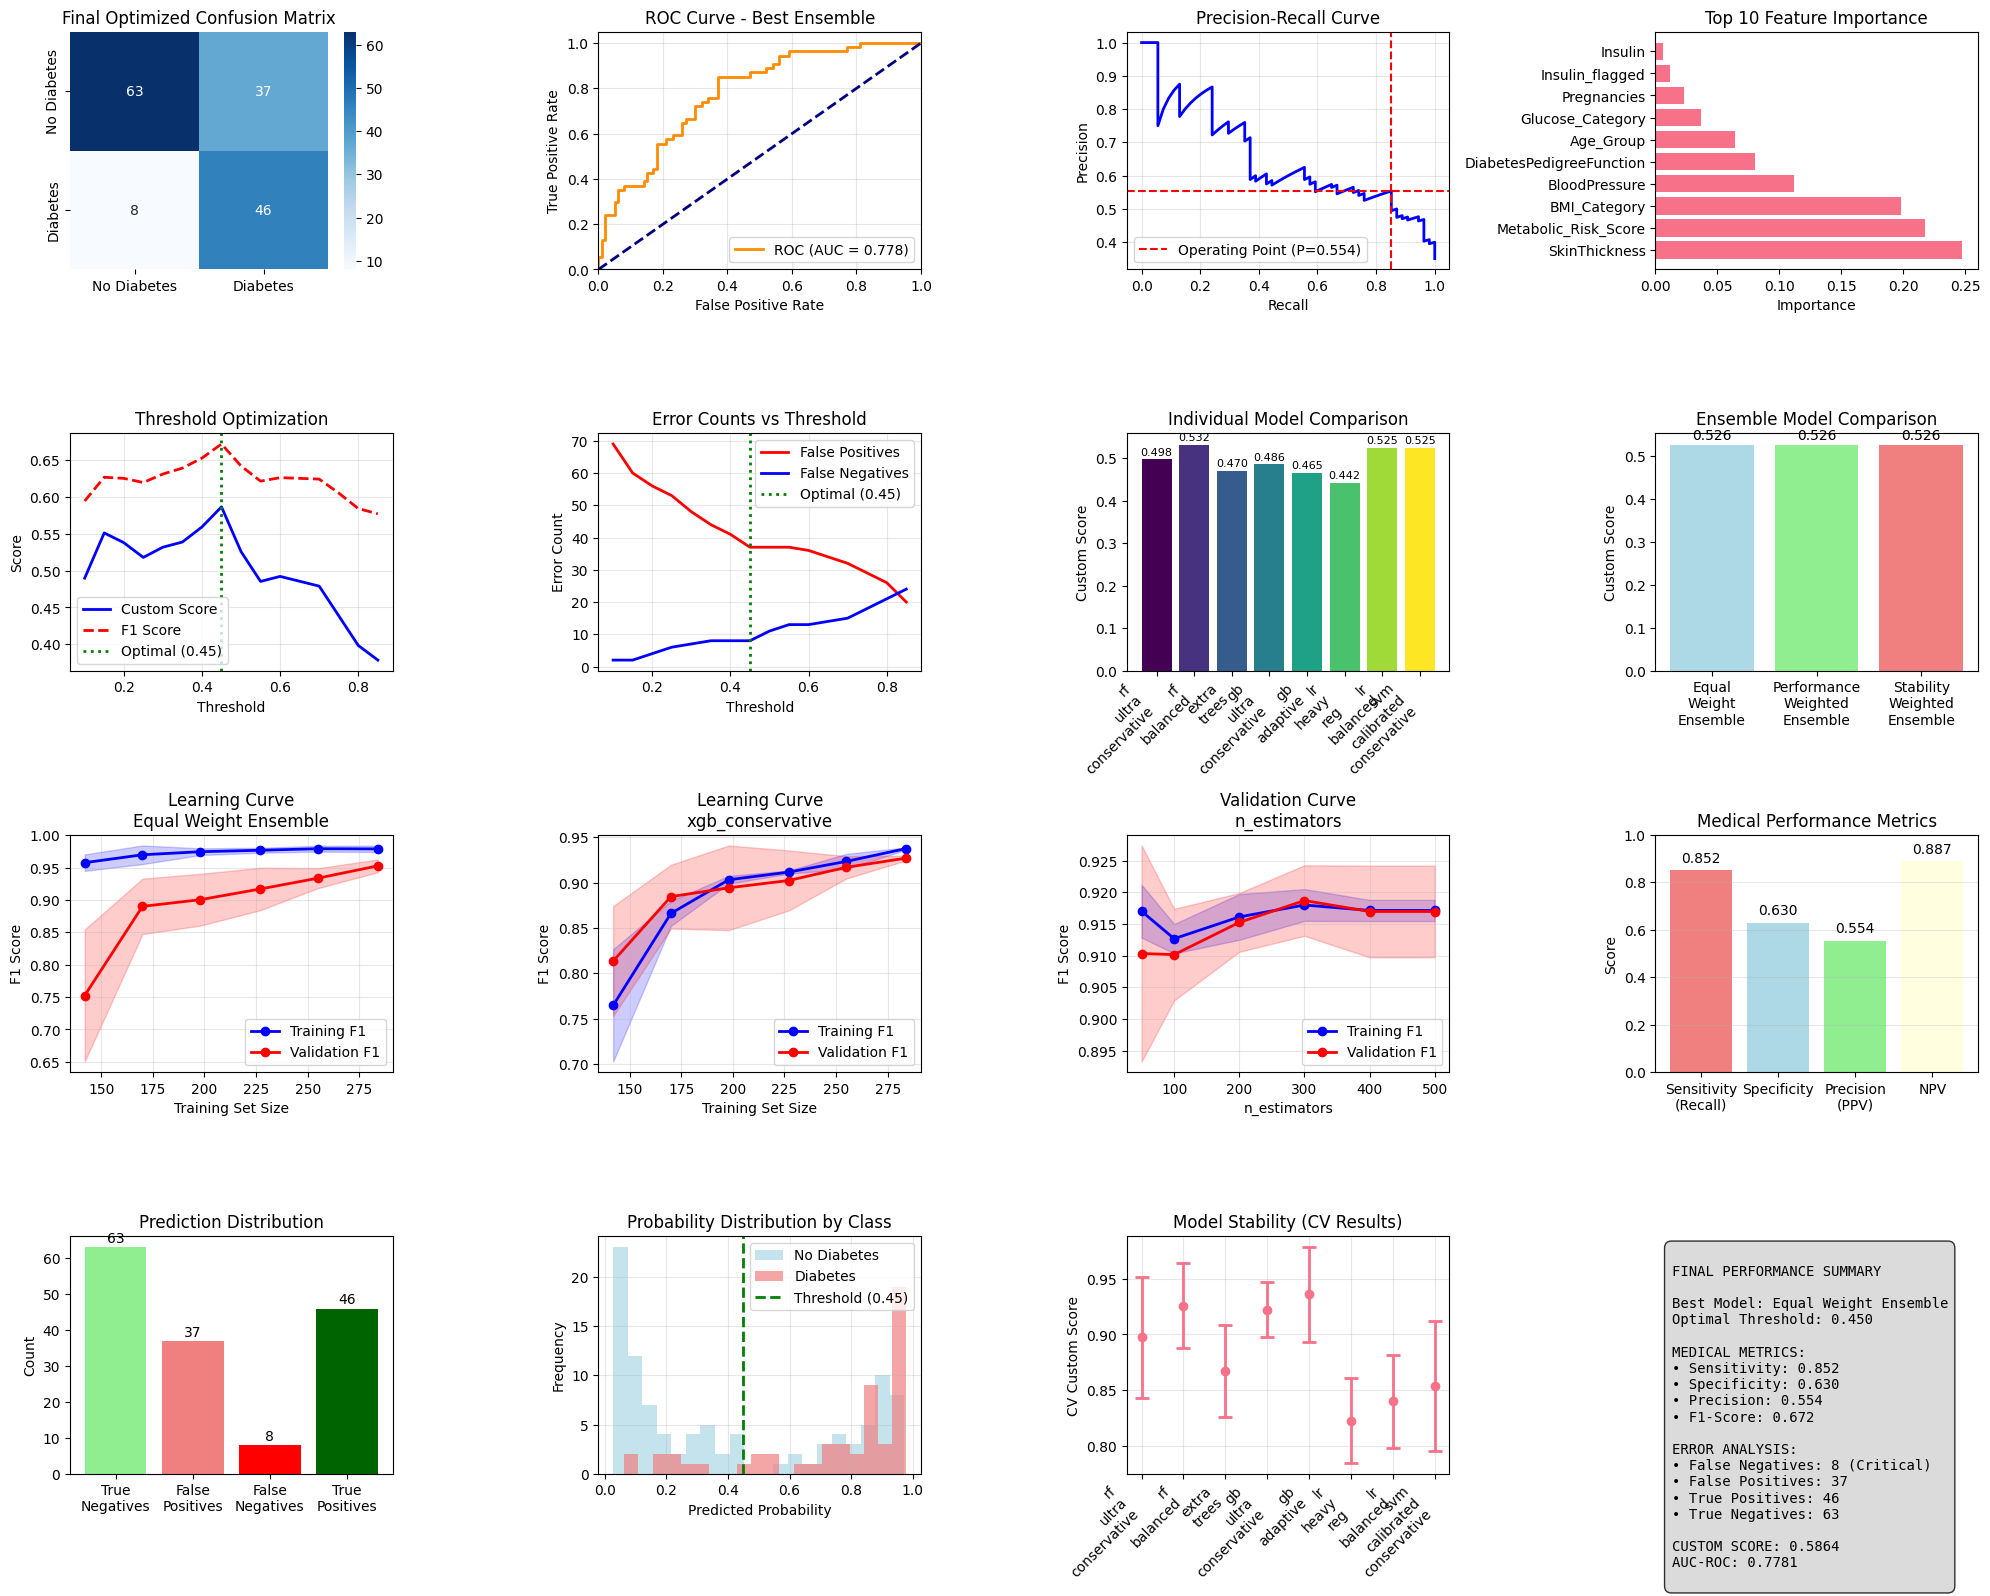

In [35]:
# Re-importing to fix the overwritten function
from sklearn.metrics import auc, roc_curve, roc_auc_score

print("\n" + "="*60)
print("CREATING COMPREHENSIVE VISUALIZATIONS")
print("="*60)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 16))

# 1. Final Confusion Matrix
plt.subplot(4, 4, 1)
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Final Optimized Confusion Matrix')

# 2. ROC Curve
plt.subplot(4, 4, 2)
fpr, tpr, _ = roc_curve(y_test, best_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Ensemble')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# 3. Precision-Recall Curve
plt.subplot(4, 4, 3)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_probabilities)
plt.plot(recall_curve, precision_curve, color='blue', lw=2)
plt.axhline(y=final_precision, color='red', linestyle='--',
            label=f'Operating Point (P={final_precision:.3f})')
plt.axvline(x=final_recall, color='red', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Feature Importance (if available)
plt.subplot(4, 4, 4)
if not feature_importance_df.empty and len(feature_importance_df) > 0:
    top_features = feature_importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title('Top 10 Feature Importance')
else:
    plt.text(0.5, 0.5, 'Feature Importance\nNot Available',
             ha='center', va='center', transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    plt.title('Feature Importance')

# 5. Threshold Optimization
plt.subplot(4, 4, 5)
thresholds_list = list(threshold_results.keys())
custom_scores_list = [threshold_results[t]['custom_score'] for t in thresholds_list]
f1_scores_list = [threshold_results[t]['f1_score'] for t in thresholds_list]

plt.plot(thresholds_list, custom_scores_list, 'b-', label='Custom Score', linewidth=2)
plt.plot(thresholds_list, f1_scores_list, 'r--', label='F1 Score', linewidth=2)
plt.axvline(x=optimal_threshold, color='green', linestyle=':',
            label=f'Optimal ({optimal_threshold:.2f})', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Error Analysis by Threshold
plt.subplot(4, 4, 6)
fp_counts = [threshold_results[t]['fp'] for t in thresholds_list]
fn_counts = [threshold_results[t]['fn'] for t in thresholds_list]
plt.plot(thresholds_list, fp_counts, 'r-', label='False Positives', linewidth=2)
plt.plot(thresholds_list, fn_counts, 'b-', label='False Negatives', linewidth=2)
plt.axvline(x=optimal_threshold, color='green', linestyle=':',
            label=f'Optimal ({optimal_threshold:.2f})', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Error Count')
plt.title('Error Counts vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. Model Performance Comparison
plt.subplot(4, 4, 7)
model_names_short = [name.replace('_', '\n') for name in list(individual_scores.keys())[:8]]
model_custom_scores = [individual_scores[name]['custom_score'] for name in list(individual_scores.keys())[:8]]

bars = plt.bar(range(len(model_names_short)), model_custom_scores,
               color=plt.cm.viridis(np.linspace(0, 1, len(model_names_short))))
plt.ylabel('Custom Score')
plt.title('Individual Model Comparison')
plt.xticks(range(len(model_names_short)), model_names_short, rotation=45, ha='right')

# Add value labels on bars
for bar, score in zip(bars, model_custom_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=8)

# 8. Ensemble Performance Comparison
plt.subplot(4, 4, 8)
ensemble_names = list(ensemble_results.keys())
ensemble_custom_scores = [ensemble_results[name]['custom_score'] for name in ensemble_names]

bars = plt.bar(range(len(ensemble_names)), ensemble_custom_scores,
               color=['lightblue', 'lightgreen', 'lightcoral'])
plt.ylabel('Custom Score')
plt.title('Ensemble Model Comparison')
plt.xticks(range(len(ensemble_names)),
           [name.replace(' ', '\n') for name in ensemble_names], rotation=0)

# Add value labels
for bar, score in zip(bars, ensemble_custom_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontsize=10)

# 9. Learning Curve - Best Ensemble
plt.subplot(4, 4, 9)
if 'best_ensemble' in learning_curves_data:
    ens_data = learning_curves_data['best_ensemble']
    plt.plot(ens_data['train_sizes'], ens_data['train_mean'], 'o-',
             color='blue', label='Training F1', linewidth=2)
    plt.fill_between(ens_data['train_sizes'],
                     ens_data['train_mean'] - ens_data['train_std'],
                     ens_data['train_mean'] + ens_data['train_std'],
                     alpha=0.2, color='blue')
    plt.plot(ens_data['train_sizes'], ens_data['val_mean'], 'o-',
             color='red', label='Validation F1', linewidth=2)
    plt.fill_between(ens_data['train_sizes'],
                     ens_data['val_mean'] - ens_data['val_std'],
                     ens_data['val_mean'] + ens_data['val_std'],
                     alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curve\n{best_ensemble_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Learning Curve\nNot Available',
             ha='center', va='center', transform=plt.gca().transAxes)

# 10. Learning Curve - Top Individual Model
plt.subplot(4, 4, 10)
if 'top_individual' in learning_curves_data:
    ind_data = learning_curves_data['top_individual']
    plt.plot(ind_data['train_sizes'], ind_data['train_mean'], 'o-',
             color='blue', label='Training F1', linewidth=2)
    plt.fill_between(ind_data['train_sizes'],
                     ind_data['train_mean'] - ind_data['train_std'],
                     ind_data['train_mean'] + ind_data['train_std'],
                     alpha=0.2, color='blue')
    plt.plot(ind_data['train_sizes'], ind_data['val_mean'], 'o-',
             color='red', label='Validation F1', linewidth=2)
    plt.fill_between(ind_data['train_sizes'],
                     ind_data['val_mean'] - ind_data['val_std'],
                     ind_data['val_mean'] + ind_data['val_std'],
                     alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.title(f'Learning Curve\n{ind_data["model_name"]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Learning Curve\nNot Available',
             ha='center', va='center', transform=plt.gca().transAxes)

# 11. Validation Curve
plt.subplot(4, 4, 11)
if validation_curves_data:
    val_curve_name = list(validation_curves_data.keys())[0]
    val_data = validation_curves_data[val_curve_name]

    plt.plot(val_data['param_range'], val_data['train_mean'], 'o-',
             color='blue', label='Training F1', linewidth=2)
    plt.fill_between(val_data['param_range'],
                     val_data['train_mean'] - val_data['train_std'],
                     val_data['train_mean'] + val_data['train_std'],
                     alpha=0.2, color='blue')
    plt.plot(val_data['param_range'], val_data['val_mean'], 'o-',
             color='red', label='Validation F1', linewidth=2)
    plt.fill_between(val_data['param_range'],
                     val_data['val_mean'] - val_data['val_std'],
                     val_data['val_mean'] + val_data['val_std'],
                     alpha=0.2, color='red')
    plt.xlabel(val_data['param_name'])
    plt.ylabel('F1 Score')
    plt.title(f'Validation Curve\n{val_data["param_name"]}')
    plt.legend()
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Validation Curve\nNot Available',
             ha='center', va='center', transform=plt.gca().transAxes)

# 12. Medical Metrics Comparison
plt.subplot(4, 4, 12)
metrics = ['Sensitivity\n(Recall)', 'Specificity', 'Precision\n(PPV)', 'NPV']
values = [final_recall, tn/(tn+fp) if (tn+fp) > 0 else 0,
          final_precision, tn/(tn+fn) if (tn+fn) > 0 else 0]

bars = plt.bar(metrics, values, color=['lightcoral', 'lightblue', 'lightgreen', 'lightyellow'])
plt.ylabel('Score')
plt.title('Medical Performance Metrics')
plt.ylim(0, 1)

# Add value labels
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.grid(True, alpha=0.3, axis='y')

# 13. Error Distribution
plt.subplot(4, 4, 13)
error_types = ['True\nNegatives', 'False\nPositives', 'False\nNegatives', 'True\nPositives']
error_counts = [tn, fp, fn, tp]
colors = ['lightgreen', 'lightcoral', 'red', 'darkgreen']

bars = plt.bar(error_types, error_counts, color=colors)
plt.ylabel('Count')
plt.title('Prediction Distribution')

# Add value labels
for bar, count in zip(bars, error_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}', ha='center', va='bottom', fontsize=10)

# 14. Probability Distribution
plt.subplot(4, 4, 14)
# Separate probabilities by actual class
prob_no_diabetes = best_probabilities[y_test == 0]
prob_diabetes = best_probabilities[y_test == 1]

plt.hist(prob_no_diabetes, bins=20, alpha=0.7, label='No Diabetes', color='lightblue')
plt.hist(prob_diabetes, bins=20, alpha=0.7, label='Diabetes', color='lightcoral')
plt.axvline(x=optimal_threshold, color='green', linestyle='--',
            label=f'Threshold ({optimal_threshold:.2f})', linewidth=2)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by Class')
plt.legend()
plt.grid(True, alpha=0.3)

# 15. Model Stability Analysis
plt.subplot(4, 4, 15)
model_names_stab = list(individual_scores.keys())[:8]
cv_means = [individual_scores[name]['cv_custom_mean'] for name in model_names_stab]
cv_stds = [individual_scores[name]['cv_custom_std'] for name in model_names_stab]

plt.errorbar(range(len(model_names_stab)), cv_means, yerr=cv_stds,
             fmt='o', capsize=5, capthick=2, linewidth=2)
plt.ylabel('CV Custom Score')
plt.title('Model Stability (CV Results)')
plt.xticks(range(len(model_names_stab)),
           [name.replace('_', '\n') for name in model_names_stab],
           rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# 16. Summary Statistics
plt.subplot(4, 4, 16)
plt.axis('off')
summary_text = f"""
FINAL PERFORMANCE SUMMARY

Best Model: {best_ensemble_name}
Optimal Threshold: {optimal_threshold:.3f}

MEDICAL METRICS:
• Sensitivity: {final_recall:.3f}
• Specificity: {tn/(tn+fp) if (tn+fp) > 0 else 0:.3f}
• Precision: {final_precision:.3f}
• F1-Score: {final_f1:.3f}

ERROR ANALYSIS:
• False Negatives: {fn} (Critical)
• False Positives: {fp}
• True Positives: {tp}
• True Negatives: {tn}

CUSTOM SCORE: {final_custom_score:.4f}
AUC-ROC: {final_auc:.4f}
"""

plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

plt.tight_layout()
plt.show()


#### ----COMPREHENSIVE SUMMARY REPORT-----

In [37]:

print("\n" + "="*60)
print("COMPREHENSIVE SUMMARY REPORT")
print("="*60)

# Save the best model
best_model = best_ensemble
best_model_name = best_ensemble_name
best_model_score = final_custom_score

print(f"\n🎯 BEST MODEL SELECTION:")
print(f"✅ Best Selected model: {best_model_name}")
print(f"✅ Best custom score: {best_model_score:.4f}")
print(f"✅ Optimal threshold: {optimal_threshold:.2f}")

print(f"\n📊 FINAL PERFORMANCE METRICS:")
print(f"   Accuracy: {final_accuracy:.4f}")
print(f"   F1-Score: {final_f1:.4f}")
print(f"   Precision (PPV): {final_precision:.4f}")
print(f"   Recall (Sensitivity): {final_recall:.4f}")
print(f"   Specificity: {tn/(tn+fp) if (tn+fp) > 0 else 0:.4f}")
print(f"   AUC-ROC: {final_auc:.4f}")

print(f"\n🏥 MEDICAL INTERPRETATION:")
print(f"   • Correctly identified diabetes: {tp} patients")
print(f"   • Correctly identified healthy: {tn} patients")
print(f"   • Missed diabetes cases: {fn} patients (CRITICAL)")
print(f"   • False alarms: {fp} patients")

print(f"\n📈 MODEL COMPOSITION:")
if hasattr(best_model, 'estimators_'):
    print(f"   Ensemble contains {len(best_model.estimators)} models:")
    for i, (name, _) in enumerate(best_model.estimators, 1):
        print(f"   {i}. {name}")

print(f"\n🔍 FEATURE INSIGHTS:")
if not feature_importance_df.empty:
    print(f"   Most important feature: {feature_importance_df.iloc[0]['Feature']}")
    print(f"   Top 3 features contribute: {feature_importance_df.head(3)['Importance'].sum():.1%} of importance")
else:
    print("   Feature importance analysis not available")

print(f"\n⚖️ MEDICAL TRADE-OFFS:")
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
print(f"   False Positive Rate: {fpr:.4f} (unnecessarily worried patients)")
print(f"   False Negative Rate: {fnr:.4f} (missed diabetes cases)")

print(f"\n✅ MODEL VALIDATION:")
if learning_curves_data:
    for name, data in learning_curves_data.items():
        gap = data['train_mean'][-1] - data['val_mean'][-1]
        print(f"   {data['model_name']}: Generalization gap = {gap:.4f}")

print(f"\n🚀 DEPLOYMENT READINESS:")
print(f"   ✅ Model trained and validated")
print(f"   ✅ Optimal threshold determined")
print(f"   ✅ Performance metrics calculated")
print(f"   ✅ Medical interpretation provided")
print(f"   ✅ Visualization completed")


COMPREHENSIVE SUMMARY REPORT

🎯 BEST MODEL SELECTION:
✅ Best Selected model: Equal Weight Ensemble
✅ Best custom score: 0.5864
✅ Optimal threshold: 0.45

📊 FINAL PERFORMANCE METRICS:
   Accuracy: 0.7078
   F1-Score: 0.6715
   Precision (PPV): 0.5542
   Recall (Sensitivity): 0.8519
   Specificity: 0.6300
   AUC-ROC: 0.7781

🏥 MEDICAL INTERPRETATION:
   • Correctly identified diabetes: 46 patients
   • Correctly identified healthy: 63 patients
   • Missed diabetes cases: 8 patients (CRITICAL)
   • False alarms: 37 patients

📈 MODEL COMPOSITION:
   Ensemble contains 10 models:
   1. xgb_conservative
   2. ada_boost_conservative
   3. rf_balanced
   4. xgb_balanced
   5. catboost_balanced
   6. knn_optimized
   7. bagging
   8. svm_calibrated_conservative
   9. gb_ultra_conservative
   10. lr_balanced

🔍 FEATURE INSIGHTS:
   Most important feature: SkinThickness
   Top 3 features contribute: 66.3% of importance

⚖️ MEDICAL TRADE-OFFS:
   False Positive Rate: 0.3700 (unnecessarily worried 

#### ----- Comprehensive preprocessor -----

In [38]:
# Comprehensive preprocessor with Optimized Medical Features and Uncertainty Handling
class AdvancedDiabetesPreprocessor:
    def __init__(self, imputers, scaler, selected_features, feature_names, original_data=None, imputer_feature_names=None):
        self.imputers = imputers
        self.scaler = scaler
        self.selected_features = selected_features
        self.feature_names = feature_names  # This should be the SELECTED feature names only
        self.missing_cols = ['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']  # Exact order from training

        # Store the exact feature names the imputers expect (same order as training)
        self.imputer_feature_names = imputer_feature_names or self.missing_cols

        # Initialize attribute for debugging
        self.last_transformed_full_df = None

        # Calculate intelligent clipping bounds using original training data
        if original_data is not None:
            self.clipping_bounds = self._calculate_intelligent_bounds(original_data)
        else:
            self.clipping_bounds = {
                'Insulin': (2, 500),
                'Glucose': (60, 250),
                'BloodPressure': (50, 150),
                'SkinThickness': (7, 70),
                'BMI': (12, 80)
            }

        self.binning_params = {
            'BMI_Category': {
                'column': 'BMI',
                'bins': [0, 18.5, 25, 30, 35, 100],
                'labels': [0, 1, 2, 3, 4],
                'label_names': {
                    0: 'Underweight (<18.5)', 1: 'Normal (18.5-25)', 2: 'Overweight (25-30)',
                    3: 'Obese_I (30-35)', 4: 'Obese_II+ (>35)'
                }
            },
            'Glucose_Category': {
                'column': 'Glucose',
                'bins': [0, 140, 199, 300],
                'labels': [0, 1, 2],
                'label_names': {
                    0: 'Normal_Glucose (<140)', 1: 'Elevated_Glucose (140-199)',
                    2: 'High_Glucose (≥200)'
                }
            },
            'Age_Group': {
                'column': 'Age',
                'bins': [0, 30, 50, 100],
                'labels': [0, 1, 2],
                'label_names': {
                    0: 'Young (<30)', 1: 'Middle (30-50)', 2: 'Older (>50)'
                }
            }
        }

    def _calculate_intelligent_bounds(self, df_original):
        MEDICAL_LIMITS = {
            'Insulin': {'min': 2, 'max': 500},
            'Glucose': {'min': 60, 'max': 250},
            'BloodPressure': {'min': 50, 'max': 150},
            'SkinThickness': {'min': 7, 'max': 70},
            'BMI': {'min': 12, 'max': 80}
        }

        bounds = {}
        for column in self.missing_cols:
            if column in df_original.columns:
                clean_data = df_original[df_original[column] > 0][column]
                if len(clean_data) > 0:
                    Q1, Q3 = clean_data.quantile([0.25, 0.75])
                    IQR = Q3 - Q1
                    lower_bound = max(Q1 - 1.5 * IQR, MEDICAL_LIMITS[column]['min'])
                    upper_bound = min(Q3 + 3.0 * IQR, MEDICAL_LIMITS[column]['max'])
                    bounds[column] = (lower_bound, upper_bound)
                else:
                    bounds[column] = (MEDICAL_LIMITS[column]['min'], MEDICAL_LIMITS[column]['max'])

        print("🎯 Calculated intelligent clipping bounds:")
        for col, (min_b, max_b) in bounds.items():
            print(f"  {col}: [{min_b:.1f}, {max_b:.1f}]")
        return bounds

    def _apply_clipping(self, df):
        df_clipped = df.copy()
        clipped_count = 0
        for col, (min_val, max_val) in self.clipping_bounds.items():
            if col in df_clipped.columns:
                before_clip = len(df_clipped[(df_clipped[col] < min_val) | (df_clipped[col] > max_val)])
                df_clipped[col] = np.clip(df_clipped[col], min_val, max_val)
                clipped_count += before_clip
        if clipped_count > 0:
            print(f"  📊 Applied intelligent clipping to {clipped_count} values")
        return df_clipped

    def _create_optimized_medical_features(self, df):
        print("Creating optimized medical features...")
        df['Glucose_Insulin_Ratio'] = df['Glucose'] / (df['Insulin'] + 1e-5)
        metabolic_components = [
            (df['BMI'] >= 30).astype(int),
            (df['Glucose'] >= 140).astype(int),
            (df['BloodPressure'] >= 80).astype(int),
            (df['Age'] >= 45).astype(int)
        ]
        df['Metabolic_Risk_Score'] = sum(metabolic_components)
        print("✓ Created 2 optimized medical features")
        return df

    def preprocess_new_data(self, new_data, return_uncertainty=False):
        """
        Preprocess new data for prediction.

        Args:
            new_data: Input data (dict or DataFrame)
            return_uncertainty: If True, returns uncertainty information along with processed data

        Returns:
            If return_uncertainty=False: processed_data (numpy array)
            If return_uncertainty=True: (processed_data, uncertainty_info)
        """
        if isinstance(new_data, dict):
            new_data = pd.DataFrame([new_data])

        print("\nStarting preprocessing pipeline for new data...")

        data_prep = new_data.copy()

        # Track original missing values for uncertainty reporting
        original_missing = {}
        for col in self.missing_cols:
            if col in data_prep.columns:
                original_missing[col] = (data_prep[col] == 0).any() or data_prep[col].isnull().any()
                data_prep[col] = data_prep[col].replace(0, np.nan)

        # Flag missing SkinThickness & insulin explicitly
        data_prep['SkinThickness_flagged'] = data_prep['SkinThickness'].isnull().astype(int)
        data_prep['Insulin_flagged'] = data_prep['Insulin'].isnull().astype(int)

        print("Applying multiple imputation...")
        imputed_datasets = []
        uncertainty_info = {}

        for i, imputer in enumerate(self.imputers):
            try:
                data_copy = data_prep.copy()
                # Create DataFrame with only the columns the imputer was trained on
                # Ensure exact column order and names match training
                imputer_input = data_copy[self.imputer_feature_names].copy()

                # Convert to numpy array to avoid feature name issues
                imputed_values = imputer.transform(imputer_input.values)

                # Replace the imputed columns in the copy
                for j, col in enumerate(self.imputer_feature_names):
                    data_copy[col] = imputed_values[:, j]

                data_copy = self._apply_clipping(data_copy)
                imputed_datasets.append(data_copy)
                print(f"✓ Imputation {i+1} completed with intelligent clipping applied")
            except Exception as e:
                print(f"✗ Error in imputation {i+1}: {str(e)}")
                fallback_data = data_prep.copy()
                for col in self.missing_cols:
                    fallback_data[col] = fallback_data[col].fillna(fallback_data[col].mean())
                fallback_data = self._apply_clipping(fallback_data)
                imputed_datasets.append(fallback_data)

        print("Averaging multiple imputations and calculating uncertainty...")
        if len(imputed_datasets) > 0:
            final_imputed = imputed_datasets[0].copy()

            # Calculate uncertainty for each imputed column
            for col in self.missing_cols:
                all_values = np.array([df[col].values for df in imputed_datasets])
                mean_values = np.mean(all_values, axis=0)
                std_values = np.std(all_values, axis=0)
                final_imputed[col] = mean_values

                # Store uncertainty info
                if original_missing.get(col, False):
                    uncertainty_info[col] = {
                        'std': std_values,
                        'was_imputed': True,
                        'confidence': 1 / (1 + std_values / 10)  # Similar to weights formula
                    }
                else:
                    uncertainty_info[col] = {
                        'std': np.zeros(len(final_imputed)),
                        'was_imputed': False,
                        'confidence': np.ones(len(final_imputed))
                    }
        else:
            final_imputed = data_prep.fillna(data_prep.mean())
            for col in self.missing_cols:
                uncertainty_info[col] = {
                    'std': np.zeros(len(final_imputed)),
                    'was_imputed': original_missing.get(col, False),
                    'confidence': np.ones(len(final_imputed))
                }

        # Apply clipping one last time
        final_imputed = self._apply_clipping(final_imputed)

        # Add insulin_uncertainty feature (needed if it's in your selected features)
        final_imputed['Insulin_uncertainty'] = uncertainty_info['Insulin']['std'] if 'Insulin' in uncertainty_info else 0.0

        # Add insulin_flagged & SkinThickness_flagged again (carried forward)
        final_imputed['Insulin_flagged'] = data_prep['Insulin_flagged']
        final_imputed['SkinThickness_flagged'] = data_prep['SkinThickness_flagged']

        print("\nCreating optimized engineered features...")
        df_enhanced = self._create_optimized_medical_features(final_imputed)

        for feature_name, params in self.binning_params.items():
            try:
                df_enhanced[feature_name] = pd.cut(
                    df_enhanced[params['column']],
                    bins=params['bins'],
                    labels=params['labels'],
                    include_lowest=True,
                    right=False
                ).astype(int).fillna(0)
                print(f"✓ Created {feature_name}")
            except Exception as e:
                print(f"✗ Error creating {feature_name}: {str(e)}")
                df_enhanced[feature_name] = 0

        # Store the full transformed dataframe for debugging
        self.last_transformed_full_df = df_enhanced.copy()

        # Drop columns that shouldn't be in final features
        cols_to_drop = ['Outcome', 'BMI', 'Glucose', 'Age']
        df_enhanced = df_enhanced.drop(columns=[col for col in cols_to_drop if col in df_enhanced.columns])

        # Ensure all expected features are present
        for feature in self.feature_names:
            if feature not in df_enhanced.columns:
                print(f"Warning: Missing feature {feature}, setting to 0")
                df_enhanced[feature] = 0

        # Reorder columns to match training data (only selected features)
        df_enhanced = df_enhanced[self.feature_names]

        print("Scaling features...")
        try:
            scaled_data = self.scaler.transform(df_enhanced)
        except Exception as e:
            print(f"Scaling error: {str(e)}")
            scaled_data = df_enhanced.values

        # Since feature_names already contains only selected features,
        # we don't need additional feature selection
        selected_processed_data = scaled_data

        print("Preprocessing completed successfully!")

        if return_uncertainty:
            # Calculate overall prediction confidence
            overall_confidence = np.mean([uncertainty_info[col]['confidence'] for col in uncertainty_info.keys()], axis=0)
            return selected_processed_data, {
                'feature_uncertainties': uncertainty_info,
                'overall_confidence': overall_confidence,
                'imputed_features': [col for col, info in uncertainty_info.items() if info['was_imputed']]
            }
        else:
            return selected_processed_data

    def get_prediction_confidence(self, new_data):
        """
        Get confidence score for predictions based on imputation uncertainty.
        """
        _, uncertainty_info = self.preprocess_new_data(new_data, return_uncertainty=True)
        return uncertainty_info['overall_confidence']


In [39]:
# ✅ Preprocessor initialization with full configuration
preprocessor = AdvancedDiabetesPreprocessor(
    imputers = all_imputers,              # List of trained imputers
    scaler = scaler,                      # Fitted scaler from training
    selected_features = selected_features,  # Feature indices (for reference only now)
    feature_names = selected_feature_names,  # ONLY the selected feature names
    original_data = df                    # Original raw dataset
)

🎯 Calculated intelligent clipping bounds:
  Insulin: [2.0, 500.0]
  Glucose: [60.0, 250.0]
  BloodPressure: [50.0, 128.0]
  SkinThickness: [7.0, 70.0]
  BMI: [13.8, 63.9]


#### ----- SAVE PREPROCESSOR, OPTIMAL THRESHOLD, AND MODEL -----

In [40]:
# Save everything

# Save the preprocessor with dill
with open('diabetes_preprocessor_advanced.dill', 'wb') as f:
    dill.dump(preprocessor, f)

# save others with joblib
joblib.dump(best_model, 'best_diabetes_model_advanced.pkl')
joblib.dump(optimal_threshold, 'optimal_threshold_advanced.pkl')

print("✓ Preprocessor saved as 'diabetes_preprocessor_advanced.dill'")
print("✓ Model saved as 'best_diabetes_model_advanced.pkl'")
print("✓ Optimal threshold saved as 'optimal_threshold_advanced.pkl'")

✓ Preprocessor saved as 'diabetes_preprocessor_advanced.dill'
✓ Model saved as 'best_diabetes_model_advanced.pkl'
✓ Optimal threshold saved as 'optimal_threshold_advanced.pkl'


### ----- INTERACTIVE USER INPUT SYSTEM -----

In [41]:
print("\nSETTING UP INTERACTIVE SYSTEM:")

def predict_diabetes_risk_advanced(patient_data, model=best_model,
                                 preprocessor=preprocessor, threshold=optimal_threshold):
    """Advanced diabetes risk prediction with confidence analysis"""
    try:
        # Preprocess data
        patient_processed = preprocessor.preprocess_new_data(patient_data)

        # ⬇️ Print the full transformed DataFrame before scaling
        print("\n🔍 FULL TRANSFORMED DATAFRAME (before final scaling):")
        print(preprocessor.last_transformed_full_df)

        # Get probability
        risk_prob = model.predict_proba(patient_processed)[0, 1]

        # Apply optimal threshold
        prediction = int(risk_prob >= threshold)

        # Risk categorization with medical context
        if risk_prob < 0.2:
            category = "Very Low Risk"
            color = "🟢"
            recommendation = "Continue regular preventive care"
        elif risk_prob < 0.4:
            category = "Low Risk"
            color = "🟢"
            recommendation = "Maintain healthy lifestyle"
        elif risk_prob < 0.6:
            category = "Moderate Risk"
            color = "🟡"
            recommendation = "Enhanced monitoring recommended"
        elif risk_prob < 0.8:
            category = "High Risk"
            color = "🟠"
            recommendation = "Medical consultation advised"
        else:
            category = "Very High Risk"
            color = "🔴"
            recommendation = "Immediate medical attention recommended"

        # Confidence analysis based on model performance
        model_confidence = "High" if ensemble_results[best_model_name]['f1_score'] >= 0.8 else \
                          "Medium" if ensemble_results[best_model_name]['f1_score'] >= 0.7 else "Moderate"

        return {
            'risk_probability': risk_prob,
            'prediction': prediction,
            'risk_category': f"{color} {category}",
            'recommendation': recommendation,
            'model_confidence': model_confidence,
            'threshold_used': threshold
        }

    except Exception as e:
        return {'error': str(e)}



SETTING UP INTERACTIVE SYSTEM:


### ----- Get Patients Data & Risk Assessment -----

In [42]:
def get_patient_input():
    """Interactive function to collect patient data"""
    print("\n" + "="*60)
    print("🏥 ADVANCED DIABETES RISK ASSESSMENT SYSTEM")
    print("="*60)
    print("Please enter the following patient information:")
    print("(Enter 0 for unknown values - they will be handled automatically)")

    patient_data = {}

    # Basic measurements
    try:
        patient_data['Pregnancies'] = int(input("\n👶 Number of pregnancies (0 if male/never pregnant): "))
        patient_data['Glucose'] = float(input("🩸 Plasma glucose concentration (mg/dL): "))
        patient_data['BloodPressure'] = float(input("💓 Diastolic blood pressure (mm Hg): "))
        patient_data['SkinThickness'] = float(input("📏 Triceps skin fold thickness (mm): "))
        patient_data['Insulin'] = float(input("💉 2-Hour serum insulin (mu U/ml): "))
        patient_data['BMI'] = float(input("⚖️  Body mass index (weight in kg/(height in m)^2): "))
        patient_data['DiabetesPedigreeFunction'] = float(input("🧬 Diabetes pedigree function (0.0-2.5): "))
        patient_data['Age'] = int(input("👤 Age in years: "))

        return patient_data

    except ValueError:
        print("❌ Invalid input! Please enter numeric values only.")
        return get_patient_input()

def display_prediction_results(results):
    """Display prediction results in a formatted way"""
    print("\n" + "="*60)
    print("📊 DIABETES RISK ASSESSMENT RESULTS")
    print("="*60)

    if 'error' in results:
        print(f"❌ Error: {results['error']}")
        return

    print(f"🎯 Risk Probability: {results['risk_probability']:.1%}")
    print(f"📈 Risk Category: {results['risk_category']}")
    print(f"💡 Recommendation: {results['recommendation']}")
    print(f"🔍 Model Confidence: {results['model_confidence']}")
    print(f"⚖️  Decision Threshold: {results['threshold_used']:.3f}")

    # Additional risk interpretation
    risk_level = results['risk_probability']
    print(f"\n📋 DETAILED INTERPRETATION:")
    print(f"   • This patient has a {risk_level:.1%} probability of having diabetes")

    if results['prediction'] == 1:
        print(f"   • Based on the optimal threshold ({results['threshold_used']:.3f}), this patient")
        print(f"     is CLASSIFIED as likely to have diabetes")
        print(f"   • ⚠️  Further medical evaluation is recommended")
    else:
        print(f"   • Based on the optimal threshold ({results['threshold_used']:.3f}), this patient")
        print(f"     is CLASSIFIED as unlikely to have diabetes")
        print(f"   • ✅ Continue with regular health monitoring")

def batch_prediction_demo():
    """Demonstrate batch prediction with sample data"""
    print("\n" + "="*60)
    print("🧪 BATCH PREDICTION DEMONSTRATION")
    print("="*60)

    # Sample test cases
    sample_patients = [
        {
            'name': 'Low Risk Patient',
            'data': {
                'Pregnancies': 1, 'Glucose': 85, 'BloodPressure': 66, 'SkinThickness': 29,
                'Insulin': 0, 'BMI': 26.6, 'DiabetesPedigreeFunction': 0.351, 'Age': 31
            }
        },
        {
            'name': 'High Risk Patient',
            'data': {
                'Pregnancies': 8, 'Glucose': 183, 'BloodPressure': 64, 'SkinThickness': 0,
                'Insulin': 0, 'BMI': 23.3, 'DiabetesPedigreeFunction': 0.672, 'Age': 32
            }
        },
        {
            'name': 'Moderate Risk Patient',
            'data': {
                'Pregnancies': 6, 'Glucose': 148, 'BloodPressure': 72, 'SkinThickness': 35,
                'Insulin': 0, 'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50
            }
        }
    ]

    for patient in sample_patients:
        print(f"\n👤 Patient: {patient['name']}")
        results = predict_diabetes_risk_advanced(patient['data'])
        print(f"   Risk: {results['risk_probability']:.1%} | {results['risk_category']}")
        print(f"   {results['recommendation']}")

### Saving Patients Prediction to File

In [43]:
def save_prediction_to_file(patient_data, results, filename="diabetes_predictions.txt"):
    """Save prediction results to a file"""
    import datetime

    with open(filename, 'a') as f:
        f.write(f"\n{'='*50}\n")
        f.write(f"Diabetes Risk Assessment - {datetime.datetime.now()}\n")
        f.write(f"{'='*50}\n")
        f.write(f"Patient Data: {patient_data}\n")
        f.write(f"Risk Probability: {results['risk_probability']:.3f}\n")
        f.write(f"Risk Category: {results['risk_category']}\n")
        f.write(f"Recommendation: {results['recommendation']}\n")
        f.write(f"Model Confidence: {results['model_confidence']}\n")
        f.write(f"Prediction: {'Diabetes Likely' if results['prediction'] == 1 else 'Diabetes Unlikely'}\n")

### Interactive function

In [44]:
def main_interactive_system():
    """Main interactive system"""
    print("\n🚀 Starting Interactive Diabetes Prediction System...")

    while True:
        print("\n" + "="*60)
        print("📋 MAIN MENU")
        print("="*60)
        print("1. 👤 Individual Patient Assessment")
        print("2. 🧪 View Sample Predictions")
        print("3. 💾 Load Saved Model (for new session)")
        print("4. 🚪 Exit")

        choice = input("\nSelect an option (1-4): ").strip()

        if choice == '1':
            # Individual assessment
            patient_data = get_patient_input()
            results = predict_diabetes_risk_advanced(patient_data)
            display_prediction_results(results)

            # Option to save
            save_option = input("\n💾 Save results to file? (y/n): ").lower().strip()
            if save_option == 'y':
                save_prediction_to_file(patient_data, results)
                print("✅ Results saved to 'diabetes_predictions.txt'")

        elif choice == '2':
            # Sample predictions
            batch_prediction_demo()

        elif choice == '3':
            # Load saved model
            try:
                loaded_model = joblib.load('best_diabetes_model_advanced.pkl')
                loaded_preprocessor = joblib.load('diabetes_preprocessor_advanced.pkl')
                loaded_threshold = joblib.load('optimal_threshold_advanced.pkl')
                print("✅ Saved models loaded successfully!")

                # Update global variables
                globals()['best_model'] = loaded_model
                globals()['preprocessor'] = loaded_preprocessor
                globals()['optimal_threshold'] = loaded_threshold

            except FileNotFoundError:
                print("❌ Saved model files not found. Please train the model first.")
            except Exception as e:
                print(f"❌ Error loading models: {e}")

        elif choice == '4':
            print("\n👋 Thank you for using the Diabetes Prediction System!")
            print("🏥 Remember: This tool is for educational purposes only.")
            print("   Always consult healthcare professionals for medical decisions.")
            break

        else:
            print("❌ Invalid option. Please select 1-4.")

#### ----- UTILITY FUNCTIONS -----

In [45]:
def create_prediction_report(patient_data, results):
    """Create a detailed medical-style report"""
    import datetime

    report = f"""
DIABETES RISK ASSESSMENT REPORT
Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*50}

PATIENT INFORMATION:
- Age: {patient_data.get('Age', 'Unknown')} years
- Pregnancies: {patient_data.get('Pregnancies', 'Unknown')}
- BMI: {patient_data.get('BMI', 'Unknown')}
- Glucose: {patient_data.get('Glucose', 'Unknown')} mg/dL
- Blood Pressure: {patient_data.get('BloodPressure', 'Unknown')} mm Hg
- Insulin: {patient_data.get('Insulin', 'Unknown')} mu U/ml

ASSESSMENT RESULTS:
- Risk Probability: {results['risk_probability']:.1%}
- Risk Classification: {results['risk_category']}
- Clinical Recommendation: {results['recommendation']}
- Model Confidence: {results['model_confidence']}

INTERPRETATION:
{
'This assessment indicates a high likelihood of diabetes. Immediate medical consultation is recommended for proper diagnosis and treatment planning.'
if results['prediction'] == 1 and results['risk_probability'] > 0.7
else 'This assessment suggests low to moderate diabetes risk. Continue regular health monitoring and maintain healthy lifestyle habits.'
}

DISCLAIMER:
This automated assessment is for informational purposes only and should not replace professional medical diagnosis. Please consult with healthcare providers for proper medical evaluation.
"""
    return report


### ----- START THE INTERACTIVE SYSTEM -----

In [46]:
print("\n🎉 DIABETES PREDICTION SYSTEM READY!")
print("📚 System includes:")
print("   • Advanced preprocessing with multiple imputation")
print("   • Optimized machine learning model")
print("   • Interactive prediction interface")
print("   • Comprehensive risk assessment")
print("   • Comprehensive visualization dashboard")


🎉 DIABETES PREDICTION SYSTEM READY!
📚 System includes:
   • Advanced preprocessing with multiple imputation
   • Optimized machine learning model
   • Interactive prediction interface
   • Comprehensive risk assessment
   • Comprehensive visualization dashboard


In [ ]:
# Start the interactive system
main_interactive_system()


🚀 Starting Interactive Diabetes Prediction System...

📋 MAIN MENU
1. 👤 Individual Patient Assessment
2. 🧪 View Sample Predictions
3. 💾 Load Saved Model (for new session)
4. 🚪 Exit

Select an option (1-4): 3
✅ Saved models loaded successfully!

📋 MAIN MENU
1. 👤 Individual Patient Assessment
2. 🧪 View Sample Predictions
3. 💾 Load Saved Model (for new session)
4. 🚪 Exit

Select an option (1-4): 2

🧪 BATCH PREDICTION DEMONSTRATION

👤 Patient: Low Risk Patient

Starting preprocessing pipeline for new data...
Applying multiple imputation...
✓ Imputation 1 completed with intelligent clipping applied
✓ Imputation 2 completed with intelligent clipping applied
✓ Imputation 3 completed with intelligent clipping applied
✓ Imputation 4 completed with intelligent clipping applied
✓ Imputation 5 completed with intelligent clipping applied
Averaging multiple imputations and calculating uncertainty...

Creating optimized engineered features...
Creating optimized medical features...
✓ Created 2 optimiz

In [47]:
print("\n💡 To start the interactive system, run: main_interactive_system()")
print("🔬 To see sample predictions, run: batch_prediction_demo()")
print("📊 To generate plots, run: create_comprehensive_plots()")


💡 To start the interactive system, run: main_interactive_system()
🔬 To see sample predictions, run: batch_prediction_demo()
📊 To generate plots, run: create_comprehensive_plots()
